<a href="https://colab.research.google.com/github/conextm/python/blob/main/M3_Actividad_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![alt text](https://uniandes.edu.co/sites/default/files/logo-uniandes.png "Universidad de los Andes")

# Actividad final Módulo 3

Esta actividad estará enfocada en el análisis de regresión. Trabajaremos con el conjunto de datos: "cancer_reg.csv". El objetivo del análisis será encontrar las variables que pueden ayudarnos a predecir la tasa de mortalidad.

El trabajo se realizará de forma individual y se dispondrá del espacio de la clase 16 del módulo 3 (tres horas) para avanzar. Durante la clase se trabajará en grupos de 4 personas en salas privadas de grupos pequeños.
Presentado por= JOHN SAMUEL INFANTE
# Habilidades Intermedias para Analistas de Datos

## Módulo 3 - Modelos lineales aplicados en negocios en Python[texto del enlace](https://)

Para ver la importancia de entender el comportamiento de los datos, detectar patrones y analizar tendencias, es de gran utilidad conocer y saber usar la regresión lineal.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Objetivos

En el siguiente ejercicio vamos a poner a prueba todo lo visto en el módulo 3.<br>
Para esto se va a importar una base de datos que contiene información real de casos y datos relacionados al tratamiento y análisis del cancer en Estados Unidos.<br>
Con esta tabla de datos vamos a tratar de predecir el promedio de muertes por cancer que podríamos esperar teniendo en cuenta la siguiente información:

### Diccionario de datos
|Nombre de la Variable|Descripción|
|---|---|
|avgAnnCount|Número de casos reportados anualmente|
|avgDeathsPerYear|Promedio de muertes reportadas por año|
|incidenceRate|Promedio de casos diagnosticados <i>per capita</i>|
|medIncome|Salario medio por condado|
|popEst2015|Población del condado|
|povertyPercent|Porcentaje de la población en condición de pobreza|
|studyPerCap|Pruebas médicas <i>per capita</i> relacionadas con al cancer|
|binnedInc|Salario medio agrupado por decíl|
|MedianAge|Edad media|
|MedianAge|Edad media hombres|
|MedianAge|Edad media mujeres|
|Geography|Ubicación geográfica|
|AvgHouseholdSize|Tamaño promedio de la vivienda familiar|
|PercentMarried|Porcentaje matrimonio|
|PctNoHS18_24|Porcentaje de residentes entre 18 y 24 años con nivel educativo más avanzado: Inferior a bachiller|
|PctHS18_24|Porcentaje de residentes entre 18 y 24 años con nivel educativo más avanzado: Bachiller|
|PctSomeCol18_24|Porcentaje de residentes entre 18 y 24 años con nivel educativo más avanzado: Atendió a la universidad|
|PctBachDeg18_24|Porcentaje de residentes entre 18 y 24 años con nivel educativo más avanzado: Universidad terminada|
|PctHS25_Over|Porcentaje de residentes de 25 o más años con nivel educativo más avanzado: Bachiller|
|PctBachDeg25_Over|Porcentaje de residentes de 25 o más años con nivel educativo más avanzado: Universidad terminada|
|PctEmployed16_Over|Porcentaje de residentes de 16 o más años con empleo|
|PctUnemployed16_Over|Porcentaje de residentes de 16 o más años sin empleo|
|PctPrivateCoverage|Porcentaje de residentes con sistema de salud privada|
|PctPrivateCoverageAlone|Porcentaje de residentes con sistema de salud privada sin asistencia pública|
|PctEmpPrivCoverage|Porcentaje de residentes con sistema de salud privada provista por el empleador|
|PctPublicCoverage|Porcentaje de residentes con sistema de salud pública|
|PctPublicCoverageAlone|Porcentaje de residentes con sistema de salud pública sin asistencia pública|
|PctWhite|Porcentaje de la población que se identifica como caucásica|
|PctBlack|Porcentaje de la población que se identifica como afrodescendiente|
|PctAsian|Porcentaje de la población que se identifica como asiática|
|PctOtherRace|Porcentaje de la población que se identifica como otra raza|
|PctMarriedHouseholds|Porcentaje de hogares con familias casadas|
|BirthRate|Tasa de natalidad en relación con el número de mujeres|

La variable dependiente es `TARGET_deathRate` que es el promedio <i>per capita</i> de muertes por cancer.

### Objetivos específicos
<ul>
    <li>Realizar un análisis exploratorio de los datos</li>
    <li>Identificar y tratar datos atípicos</li>
    <li>Realizar análisis multivariados</li>
    <li>Revisar correlaciones entre variables independientes</li>
    <li>Generar modelos de regresión lineal</li>
    <li>Analizar modelos de regresión lineal</li>
    </ul>
    

## Librerías

Inicialmente importaremos pandas como librería principal, pero son libres de descargar otras librerías que consideren de utilidad para trabajar con los datos y cumplir con los objetvos.

In [ ]:
from google.colab import drive # conectar con google drive
import pandas as pd # manejo de data frames
import seaborn as sns # visualización
import numpy as np #
import statsmodels.api as sm
import io
import matplotlib.pyplot as plt #vizualizar datos, graficos
import scipy.stats # distribuciones estadísticas
from sklearn.linear_model import LinearRegression

pd.set_option("display.max_columns", None)

## Importar datos

Los datos a utiliza contienen una codificación diferente, por lo que es necesario especificar cómo se deben leer los datos al momento de cargar el Dataset.<br>
De esta forma vamos a cargar nuestra base de datos inicial. No obstante, debemos tener en cuenta que esta base puede contener datos o variables que no son de nuestro interés.<br>
Es importante dedicarle un tiempo a entender las variables y ver cuáles variables serán útiles para el proceso y argumentar el motivo para eliminar las varaibles que no son consideradas de importancia.

In [ ]:
df_cancer = pd.read_csv("cancer_reg.csv", encoding= "latin-1")

In [ ]:
df_cancer.head(2)

avgAnnCount  avgDeathsPerYear  TARGET_deathRate  incidenceRate  medIncome  \
0       1397.0               469             164.9          489.8      61898   
1        173.0                70             161.3          411.6      48127   

   popEst2015  povertyPercent  studyPerCap           binnedInc  MedianAge  \
0      260131            11.2   499.748204   (61494.5, 125635]       39.3   
1       43269            18.6    23.111234  (48021.6, 51046.4]       33.0   

   MedianAgeMale  MedianAgeFemale                    Geography  \
0           36.9             41.7    Kitsap County, Washington   
1           32.2             33.7  Kittitas County, Washington   

   AvgHouseholdSize  PercentMarried  PctNoHS18_24  PctHS18_24  \
0              2.54            52.5          11.5        39.5   
1              2.34            44.5           6.1        22.4   

   PctSomeCol18_24  PctBachDeg18_24  PctHS25_Over  PctBachDeg25_Over  \
0             42.1              6.9          23.2               19.6   
1             64.0              7.5          26.0               22.7   

   PctEmployed16_Over  PctUnemployed16_Over  PctPrivateCoverage  \
0                51.9                   8.0                75.1   
1                55.9                   7.8                70.2   

   PctPrivateCoverageAlone  PctEmpPrivCoverage  PctPublicCoverage  \
0                      NaN                41.6               32.9   
1                     53.8                43.6               31.1   

   PctPublicCoverageAlone   PctWhite  PctBlack  PctAsian  PctOtherRace  \
0                    14.0  81.780529  2.594728  4.821857      1.843479   
1                    15.3  89.228509  0.969102  2.246233      3.741352   

   PctMarriedHouseholds  BirthRate  
0             52.856076   6.118831  
1             45.372500   4.333096

## 1. EDA (un punto)

Realice un análisis exploratorio de los datos que ayude a comprender tendencias ocultas o a identificar variables que no sean de utilidad. Al final de este apartado deberá justificar las columnas que considera de poca utilidad y eliminar estas columnas.<br>
Realice algunas pruebas sobre las varaibles y argumente si el comportamiento de los datos es el esperado.<br>
Dentro de los pasos del EDA genere una variable categórica que agrupe los datos.<br>
Use gráficos de apoyo para esta tarea.

In [ ]:
print("Información sobre el DataFrame cancer_reg.csv:")
print(df_cancer.info())

Información sobre el DataFrame cancer_reg.csv:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3047 entries, 0 to 3046
Data columns (total 34 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   avgAnnCount              3047 non-null   float64
 1   avgDeathsPerYear         3047 non-null   int64  
 2   TARGET_deathRate         3047 non-null   float64
 3   incidenceRate            3047 non-null   float64
 4   medIncome                3047 non-null   int64  
 5   popEst2015               3047 non-null   int64  
 6   povertyPercent           3047 non-null   float64
 7   studyPerCap              3047 non-null   float64
 8   binnedInc                3047 non-null   object 
 9   MedianAge                3047 non-null   float64
 10  MedianAgeMale            3047 non-null   float64
 11  MedianAgeFemale          3047 non-null   float64
 12  Geography                3047 non-null   object 
 13  AvgHouseholdSize         3047 n

In [ ]:
df_cancer.describe()

avgAnnCount  avgDeathsPerYear  TARGET_deathRate  incidenceRate  \
count   3047.000000       3047.000000       3047.000000    3047.000000   
mean     606.338544        185.965868        178.664063     448.268586   
std     1416.356223        504.134286         27.751511      54.560733   
min        6.000000          3.000000         59.700000     201.300000   
25%       76.000000         28.000000        161.200000     420.300000   
50%      171.000000         61.000000        178.100000     453.549422   
75%      518.000000        149.000000        195.200000     480.850000   
max    38150.000000      14010.000000        362.800000    1206.900000   

           medIncome    popEst2015  povertyPercent  studyPerCap    MedianAge  \
count    3047.000000  3.047000e+03     3047.000000  3047.000000  3047.000000   
mean    47063.281917  1.026374e+05       16.878175   155.399415    45.272333   
std     12040.090836  3.290592e+05        6.409087   529.628366    45.304480   
min     22640.000000  8.270000e+02        3.200000     0.000000    22.300000   
25%     38882.500000  1.168400e+04       12.150000     0.000000    37.700000   
50%     45207.000000  2.664300e+04       15.900000     0.000000    41.000000   
75%     52492.000000  6.867100e+04       20.400000    83.650776    44.000000   
max    125635.000000  1.017029e+07       47.400000  9762.308998   624.000000   

       MedianAgeMale  MedianAgeFemale  AvgHouseholdSize  PercentMarried  \
count    3047.000000      3047.000000       3047.000000     3047.000000   
mean       39.570725        42.145323          2.479662       51.773679   
std         5.226017         5.292849          0.429174        6.896928   
min        22.400000        22.300000          0.022100       23.100000   
25%        36.350000        39.100000          2.370000       47.750000   
50%        39.600000        42.400000          2.500000       52.400000   
75%        42.500000        45.300000          2.630000       56.400000   
max        64.700000        65.700000          3.970000       72.500000   

       PctNoHS18_24   PctHS18_24  PctSomeCol18_24  PctBachDeg18_24  \
count   3047.000000  3047.000000       762.000000      3047.000000   
mean      18.224450    35.002068        40.977034         6.158287   
std        8.093064     9.069722        11.115805         4.529059   
min        0.000000     0.000000         7.100000         0.000000   
25%       12.800000    29.200000        34.000000         3.100000   
50%       17.100000    34.700000        40.400000         5.400000   
75%       22.700000    40.700000        46.400000         8.200000   
max       64.100000    72.500000        79.000000        51.800000   

       PctHS25_Over  PctBachDeg25_Over  PctEmployed16_Over  \
count   3047.000000        3047.000000         2895.000000   
mean      34.804660          13.282015           54.152642   
std        7.034924           5.394756            8.315064   
min        7.500000           2.500000           17.600000   
25%       30.400000           9.400000           48.600000   
50%       35.300000          12.300000           54.500000   
75%       39.650000          16.100000           60.300000   
max       54.800000          42.200000           80.100000   

       PctUnemployed16_Over  PctPrivateCoverage  PctPrivateCoverageAlone  \
count           3047.000000         3047.000000              2438.000000   
mean               7.852412           64.354939                48.453774   
std                3.452371           10.647057                10.083006   
min                0.400000           22.300000                15.700000   
25%                5.500000           57.200000                41.000000   
50%                7.600000           65.100000                48.700000   
75%                9.700000           72.100000                55.600000   
max               29.400000           92.300000                78.900000   

       PctEmpPrivCoverage  PctPublicCoverage  PctPublicCoverageAlone 

In [ ]:
print("Filas: ", df_cancer.shape[0])
print("Columnas: ", df_cancer.shape[1])
df_cancer.dtypes
cualicolumns=df_cancer.select_dtypes(exclude=["int64","float64","datetime64"]).columns
cuanticolumns=df_cancer.select_dtypes(exclude=["object","datetime64"]).columns
fechacolumns=df_cancer.select_dtypes(exclude=["object","float64","int64"]).columns
print("El número de variables categóricas es de: ", len(cualicolumns)),
print("El número de variables cuantitativas es de: ", len(cuanticolumns)),
print("El número de variables tipo fecha es de: ", len(fechacolumns))

Filas:  3047
Columnas:  34
El número de variables categóricas es de:  2
El número de variables cuantitativas es de:  32
El número de variables tipo fecha es de:  0


Complemente el <b>EDA</b> con los siguientes análisis.

### 2. Calidad de la información (un punto)

[texto del enlace](https://)Haga uso de las herramientas vistas en la clase para validar la calidad de la información.

<ipython-input-19-6f6724067e12>:1: FutureWarning: The default value of numeric_only in DataFrame.var is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  var= df_cancer.var(axis=0)


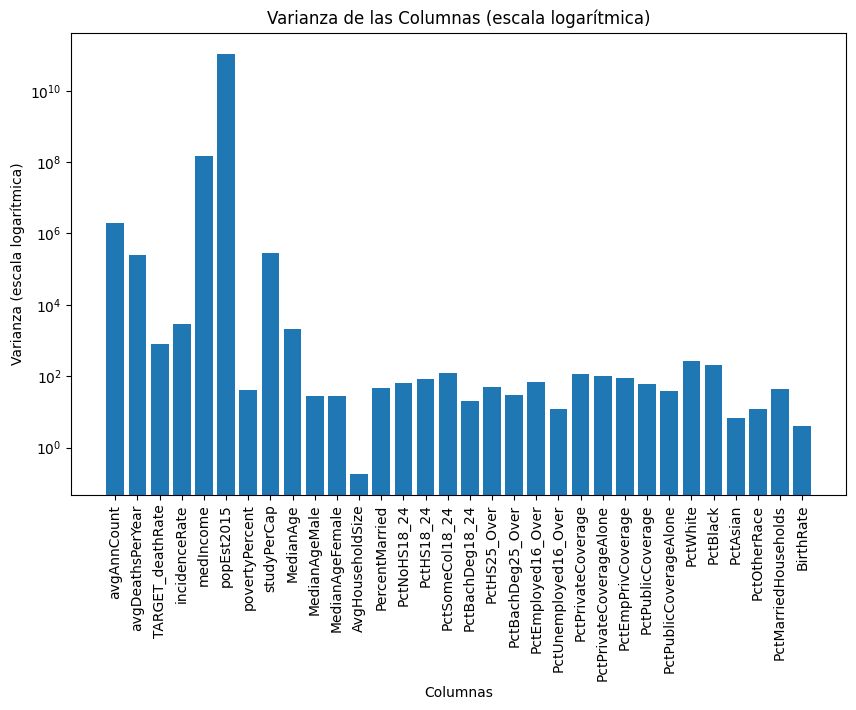

Columna: avgAnnCount, Varianza: 2006064.9510730165
Columna: avgDeathsPerYear, Varianza: 254151.37834874558
Columna: TARGET_deathRate, Varianza: 770.1463804661528
Columna: incidenceRate, Varianza: 2976.8735548701334
Columna: medIncome, Varianza: 144963787.33448246
Columna: popEst2015, Varianza: 108279970598.84984
Columna: povertyPercent, Varianza: 41.076394830733484
Columna: studyPerCap, Varianza: 280506.2061239134
Columna: MedianAge, Varianza: 2052.495921769279
Columna: MedianAgeMale, Varianza: 27.311250393000357
Columna: MedianAgeFemale, Varianza: 28.01425175856213
Columna: AvgHouseholdSize, Varianza: 0.18419063708908218
Columna: PercentMarried, Varianza: 47.567612954067606
Columna: PctNoHS18_24, Varianza: 65.49769154767473
Columna: PctHS18_24, Varianza: 82.25985455484992
Columna: PctSomeCol18_24, Varianza: 123.56111445087106
Columna: PctBachDeg18_24, Varianza: 20.512379598589057
Columna: PctHS25_Over, Varianza: 49.490155555953024
Columna: PctBachDeg25_Over, Varianza: 29.1033927863774

<ipython-input-19-6f6724067e12>:18: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for column, value in var.iteritems():


In [ ]:
var= df_cancer.var(axis=0)

plt.figure(figsize=(10, 6))

# se crea una escala log  ya que la varianza de popEst2015 es muy grande
#se determina que esta variable tiene un indice de corr(-0,12)
plt.bar(var.index, var.values)
plt.yscale("log")  # Escala logarítmica en el eje y

# Configurar etiquetas en el eje x
plt.xlabel("Columnas")
plt.xticks(rotation=90)

plt.ylabel("Varianza (escala logarítmica)")
plt.title("Varianza de las Columnas (escala logarítmica)")
plt.show()

for column, value in var.iteritems():
    print(f"Columna: {column}, Varianza: {value}")

In [ ]:
df_cancer.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
3042    False
3043    False
3044    False
3045    False
3046    False
Length: 3047, dtype: bool

In [ ]:
df_cancer.isnull().sum()

avgAnnCount                   0
avgDeathsPerYear              0
TARGET_deathRate              0
incidenceRate                 0
medIncome                     0
popEst2015                    0
povertyPercent                0
studyPerCap                   0
binnedInc                     0
MedianAge                     0
MedianAgeMale                 0
MedianAgeFemale               0
Geography                     0
AvgHouseholdSize              0
PercentMarried                0
PctNoHS18_24                  0
PctHS18_24                    0
PctSomeCol18_24            2285
PctBachDeg18_24               0
PctHS25_Over                  0
PctBachDeg25_Over             0
PctEmployed16_Over          152
PctUnemployed16_Over          0
PctPrivateCoverage            0
PctPrivateCoverageAlone     609
PctEmpPrivCoverage            0
PctPublicCoverage             0
PctPublicCoverageAlone        0
PctWhite                      0
PctBlack                      0
PctAsian                      0
PctOther

Tenemos valores nulos en las siguientes columnas:
PctEmployed16_Over: 152 nulos Porcentaje de residentes de 16 o más años con empleo,
PctPrivateCoverageAlone: 609 nulos Porcentaje de residentes con sistema de salud privada sin asistencia pública y
PctSomeCol18_24: 2285 nulos Porcentaje de residentes entre 18 y 24 años con nivel educativo más avanzado: Atendió a la universidad. Teniendo en cuenta la informacion se determina que estas columnas pueden ser eliminadas por tener missing values, ademas de ver una baja correlacion en el Heat Map.

### 3. Identificar datos atípicos (un punto)

Dentro del EDA debe incluir un análisis de datos atípicos y en caso de detectarlos, deberá proponer formas de trabajar o arreglar dichos valores.

Número total de valores atípicos en TARGET_deathRate: 64


<Figure size 1000x600 with 0 Axes>

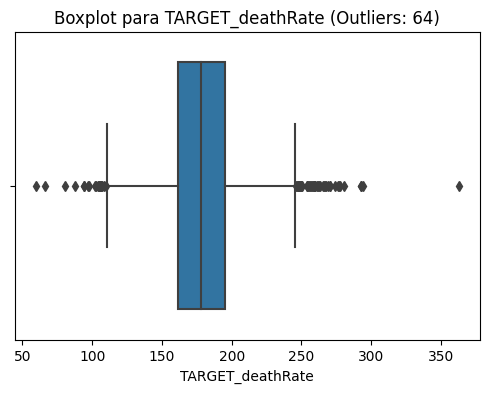

Número total de valores típicos promedio per capita de muertes por cancer. 2983
valores atípicos promedio per capita de muertes por cancer. 64


In [ ]:
plt.figure(figsize=(10, 6))

threshold = 1.5

analizar= "TARGET_deathRate"

Q1 = df_cancer[analizar].quantile(0.25)
Q3 = df_cancer[analizar].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - threshold * IQR
upper_bound = Q3 + threshold * IQR

outliers = df_cancer[(df_cancer[analizar] < lower_bound) | (df_cancer[analizar] > upper_bound)]
num_outliers = len(outliers)

# Crear un gráfico de caja con los outliers destacados
plt.figure(figsize=(6, 4))  # Tamaño de la figura para el gráfico de caja
sns.boxplot(x=df_cancer[analizar])
plt.title(f"Boxplot para {analizar} (Outliers: {num_outliers})")

# Muestra el número total de outliers en la columna específica
print(f"Número total de valores atípicos en {analizar}: {num_outliers}")
plt.show()

print("Número total de valores típicos promedio per capita de muertes por cancer.", 3047-num_outliers)
print("valores atípicos promedio per capita de muertes por cancer.",num_outliers )

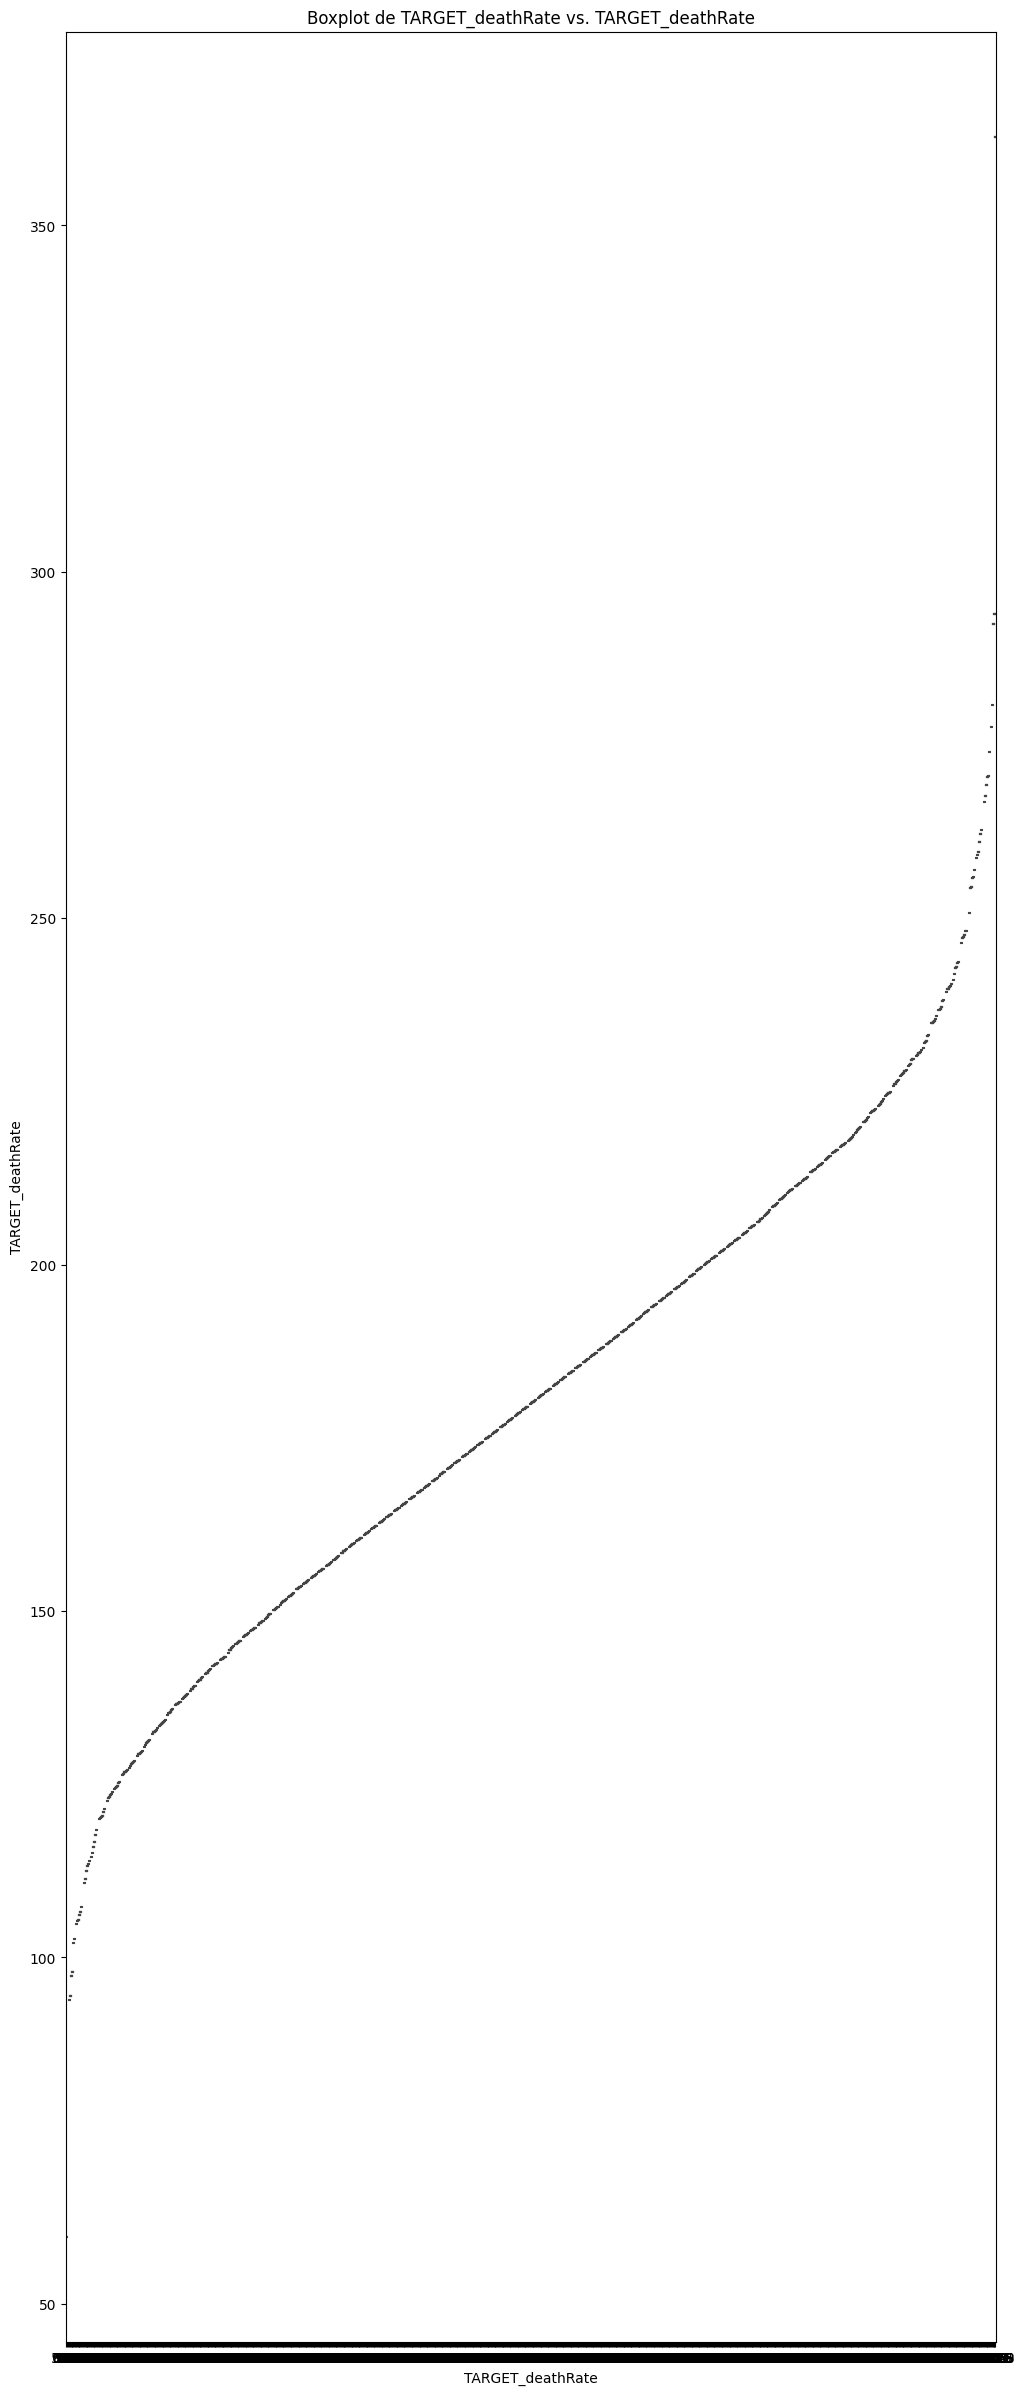

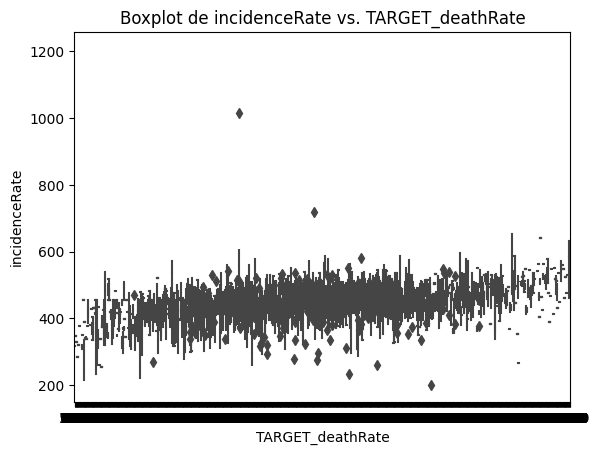

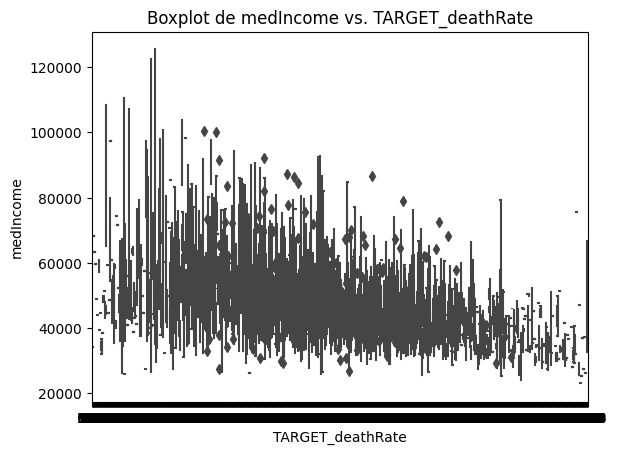

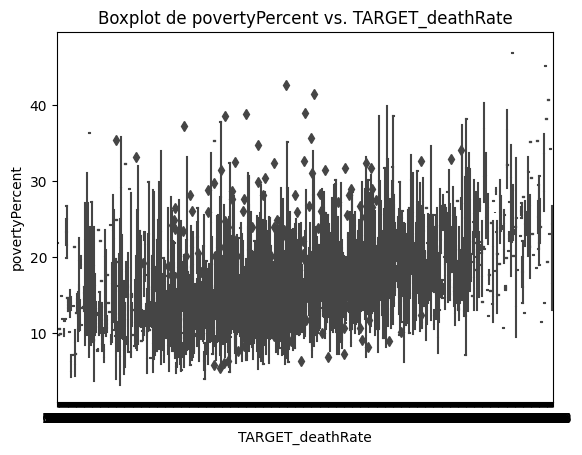

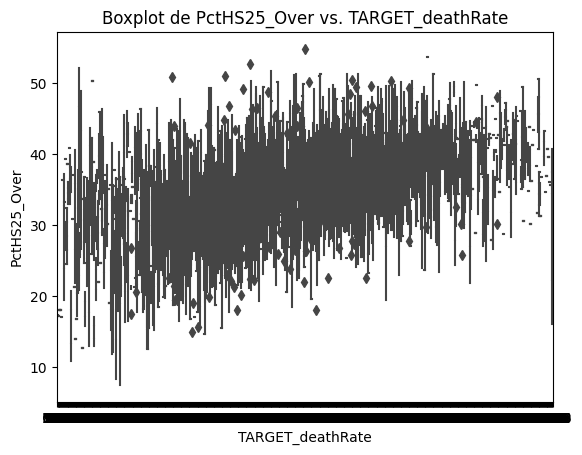

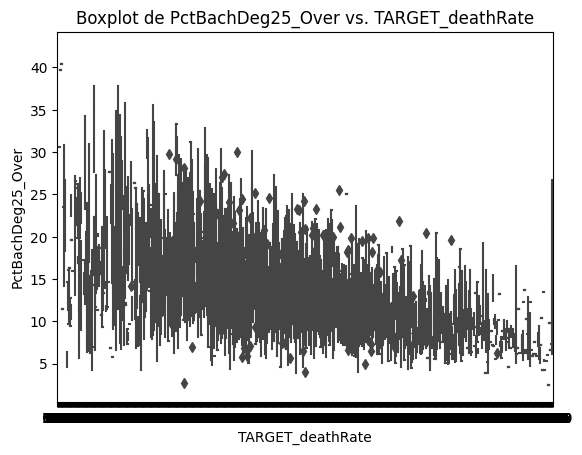

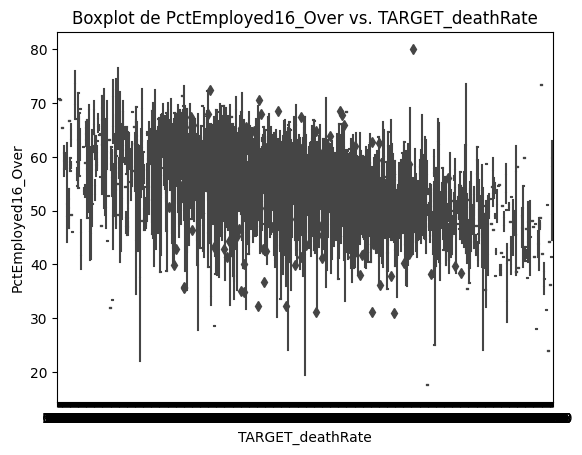

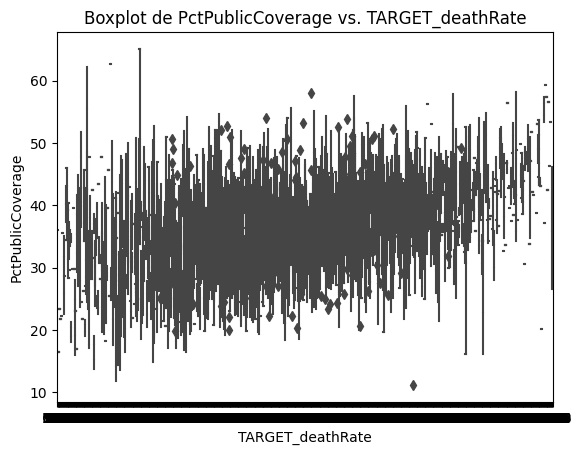

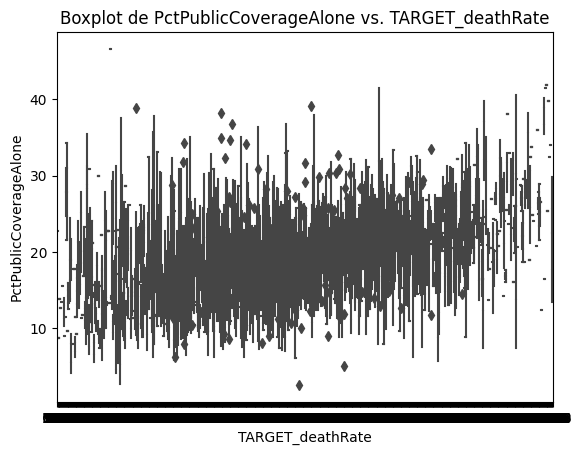

In [ ]:
columnas_de_analisis= ["TARGET_deathRate", "incidenceRate", "medIncome", "povertyPercent", "PctHS25_Over", "PctBachDeg25_Over", "PctEmployed16_Over", "PctPublicCoverage", "PctPublicCoverageAlone"]
# Configura el tamaño de la figura
plt.figure(figsize=(12, 30))

# Iterar a través de las columnas y crea un boxplot para cada variable Vs TARGET_deathRate
for column in columnas_de_analisis:
    sns.boxplot(x="TARGET_deathRate", y=column, data=df_cancer)
    plt.title(f"Boxplot de {column} vs. TARGET_deathRate")
    plt.show()

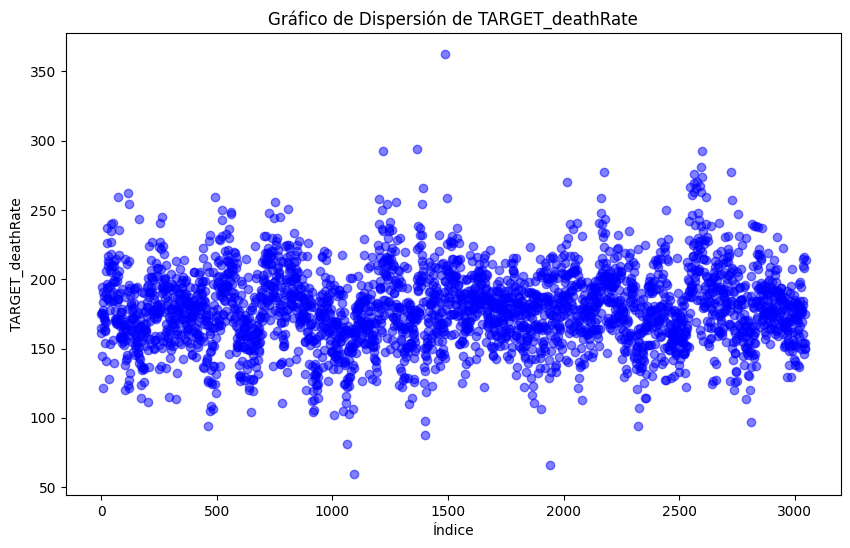

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(df_cancer.index, df_cancer["TARGET_deathRate"], alpha=0.5, color="blue")
plt.title("Gráfico de Dispersión de TARGET_deathRate")
plt.xlabel("Índice")
plt.ylabel("TARGET_deathRate")
plt.show()

In [ ]:
df_cancer['TARGET_deathRate'].describe()


count    3047.000000
mean      178.664063
std        27.751511
min        59.700000
25%       161.200000
50%       178.100000
75%       195.200000
max       362.800000
Name: TARGET_deathRate, dtype: float64

Se podrían tener en cuenta las siguientes consideraciones: imputación de datos, transformación de datos y eliminación de valores atípicos. En mi opinión, dado que se trata de un promedio per cápita de muertes por cáncer, no eliminaría los datos atípicos, ya que se trata de registros de datos médicos. No obstante, es posible observar una relación entre los datos atípicos y las variables del análisis. Se nota que en la comparación entre "TARGET_deathRate" e "incidenceRate" hay un valor atípico notable, al igual que en las demás variables.



```


```



### 4. Análisis con datos multivariados (un punto)

Analice la interacción entre variables por medio de análisis multivariado.<br>
Haga uso de gráficos para complementar este análisis.

Se valora las sigueintes variables: "TARGET_deathRate", "incidenceRate", "medIncome", "povertyPercent", "PctHS25_Over", "PctBachDeg25_Over", "PctEmployed16_Over", "PctPublicCoverage", "PctPublicCoverageAlone", se tiene en cuenta estas variables debido al analisis posterior de correlacion.

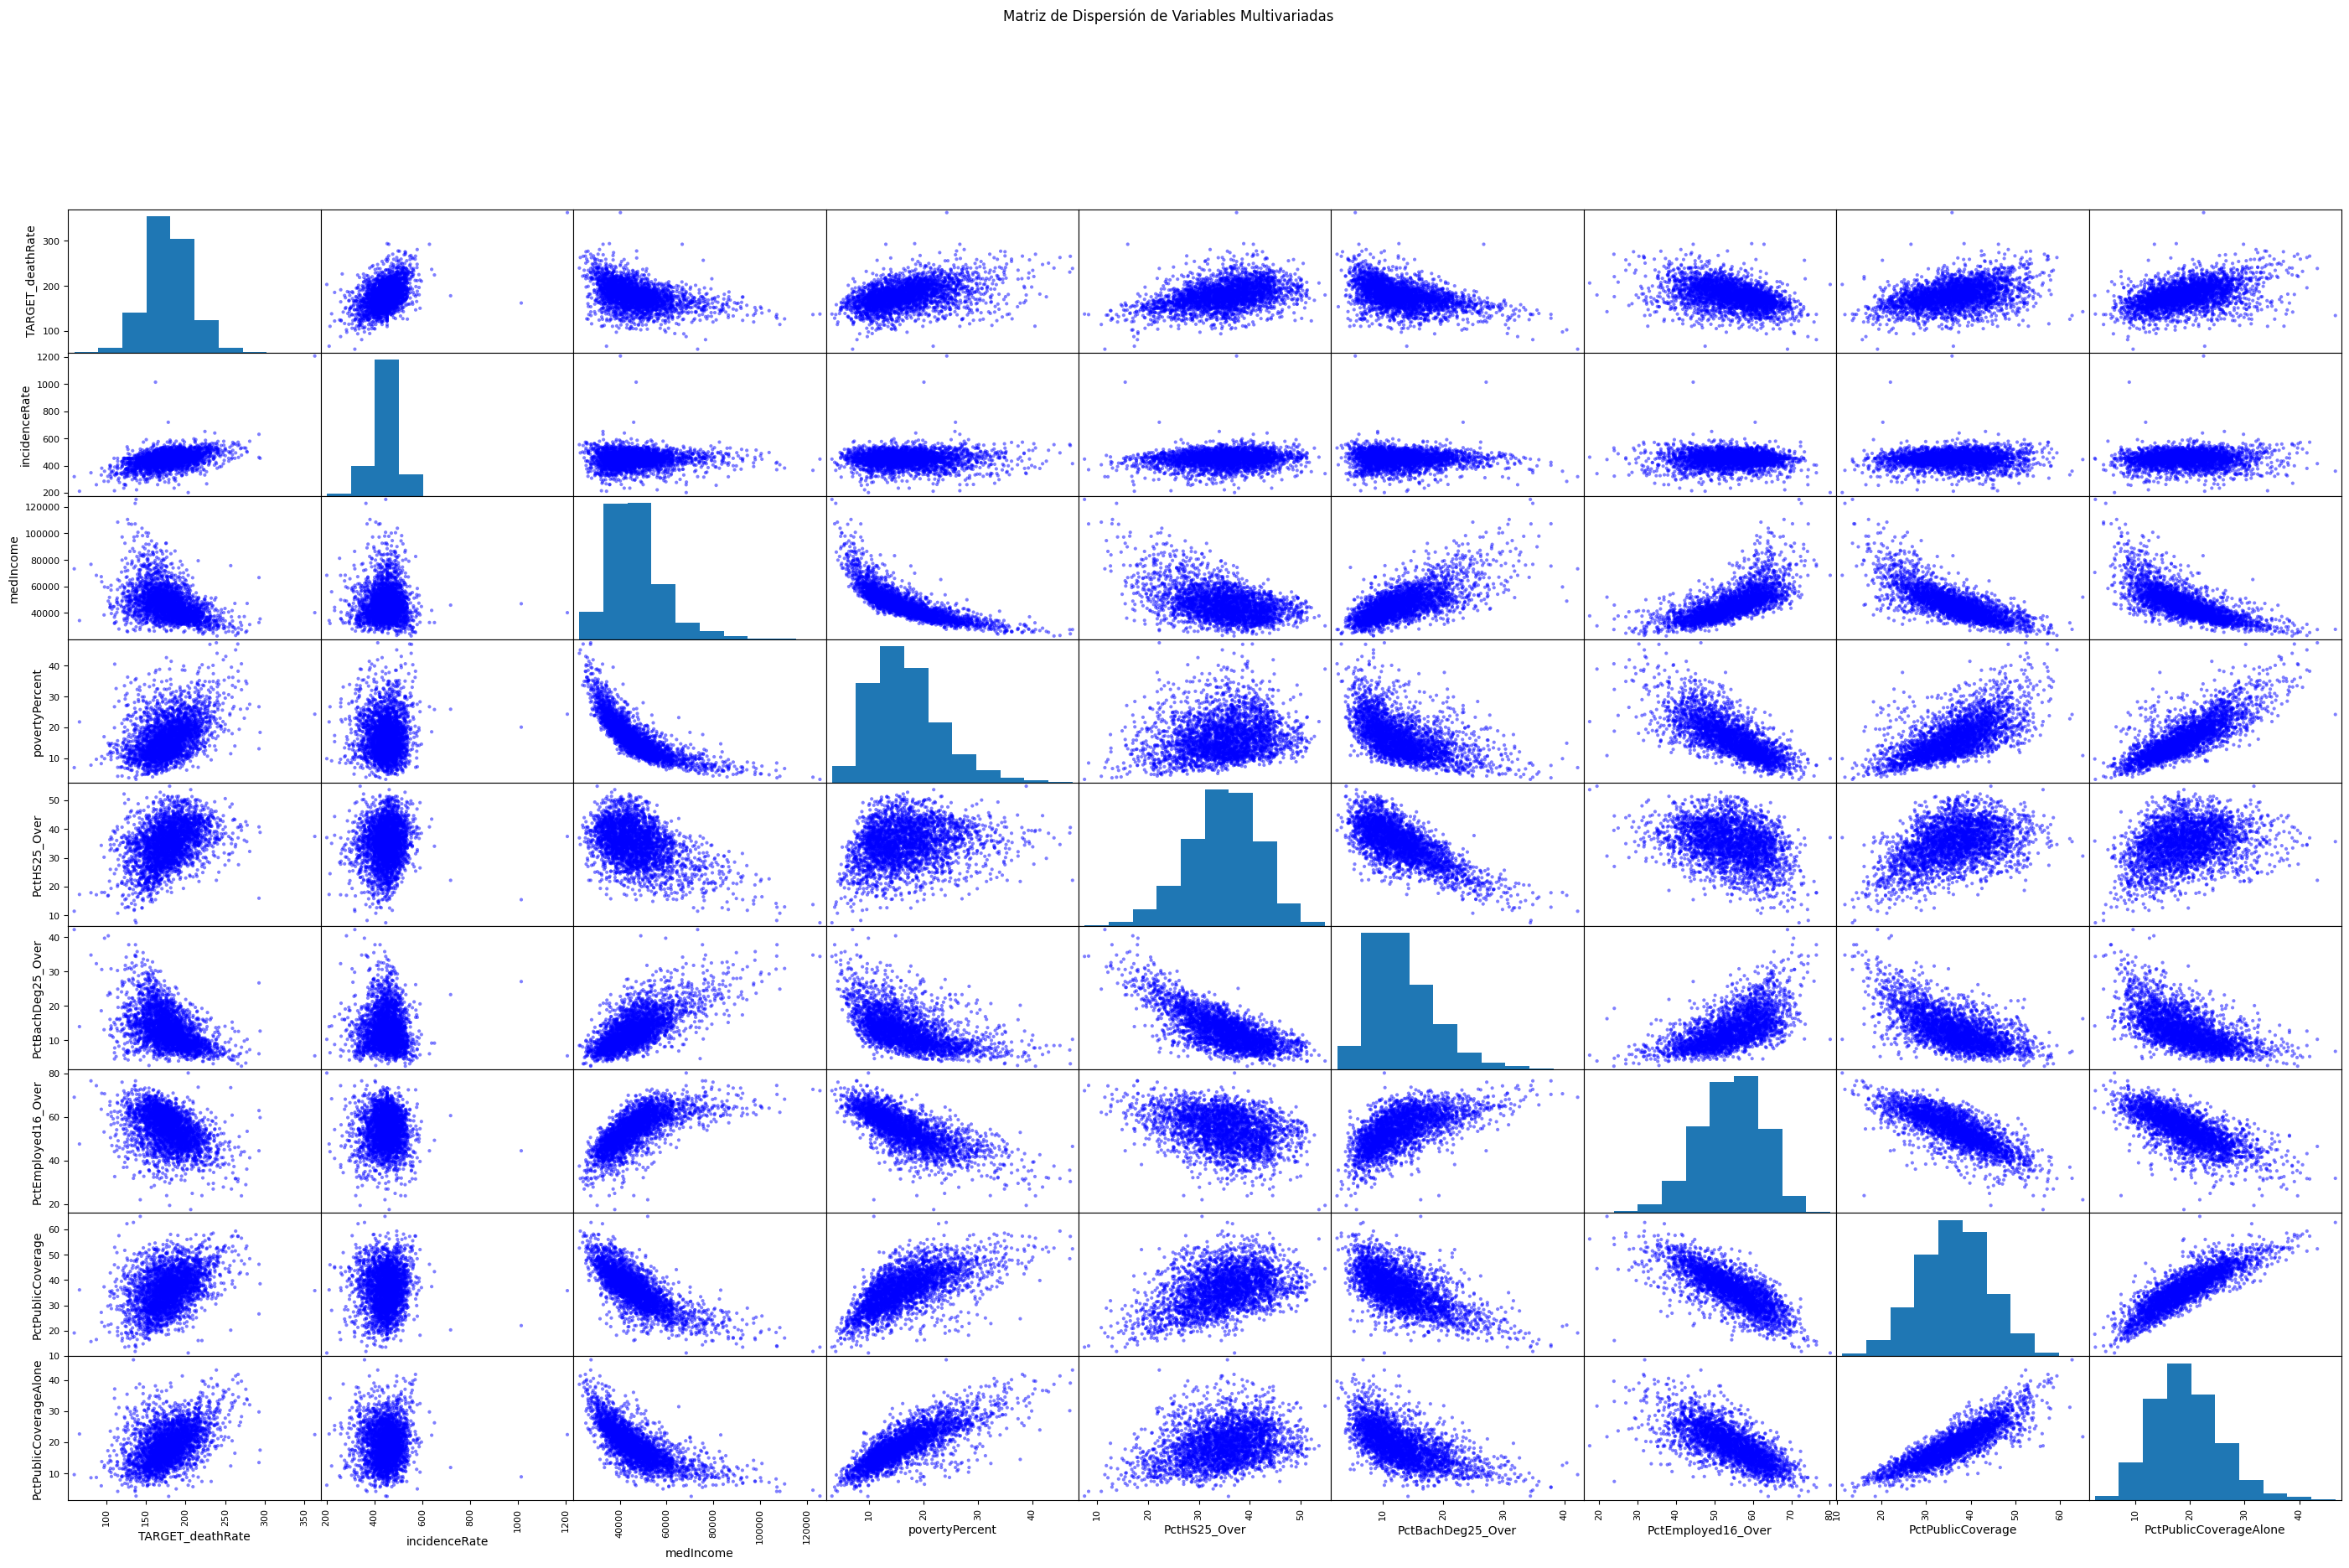

In [ ]:
columns_of_interest = ["TARGET_deathRate", "incidenceRate", "medIncome", "povertyPercent", "PctHS25_Over", "PctBachDeg25_Over", "PctEmployed16_Over", "PctPublicCoverage", "PctPublicCoverageAlone"]
# se determinan las anteriores variables debido a la correlacion de las variables con TARGET_deathRate
#Graficar dispercion de variables
pd.plotting.scatter_matrix(df_cancer[columns_of_interest], figsize=(35, 20), diagonal='hist', color="blue")
plt.suptitle("Matriz de Dispersión de Variables Multivariadas", y=1)
plt.show()

### 5. Correlación entre variables (un punto)

Por último, para cerrar el análisis exploratorio, realice un análisis de la correlación entre variables y explique los resultados obtenidos.

#### 5.1 Realice un mapa de calor con una matriz de correlación

<ipython-input-28-1a1dc7ae30f2>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df_cancer.corr()


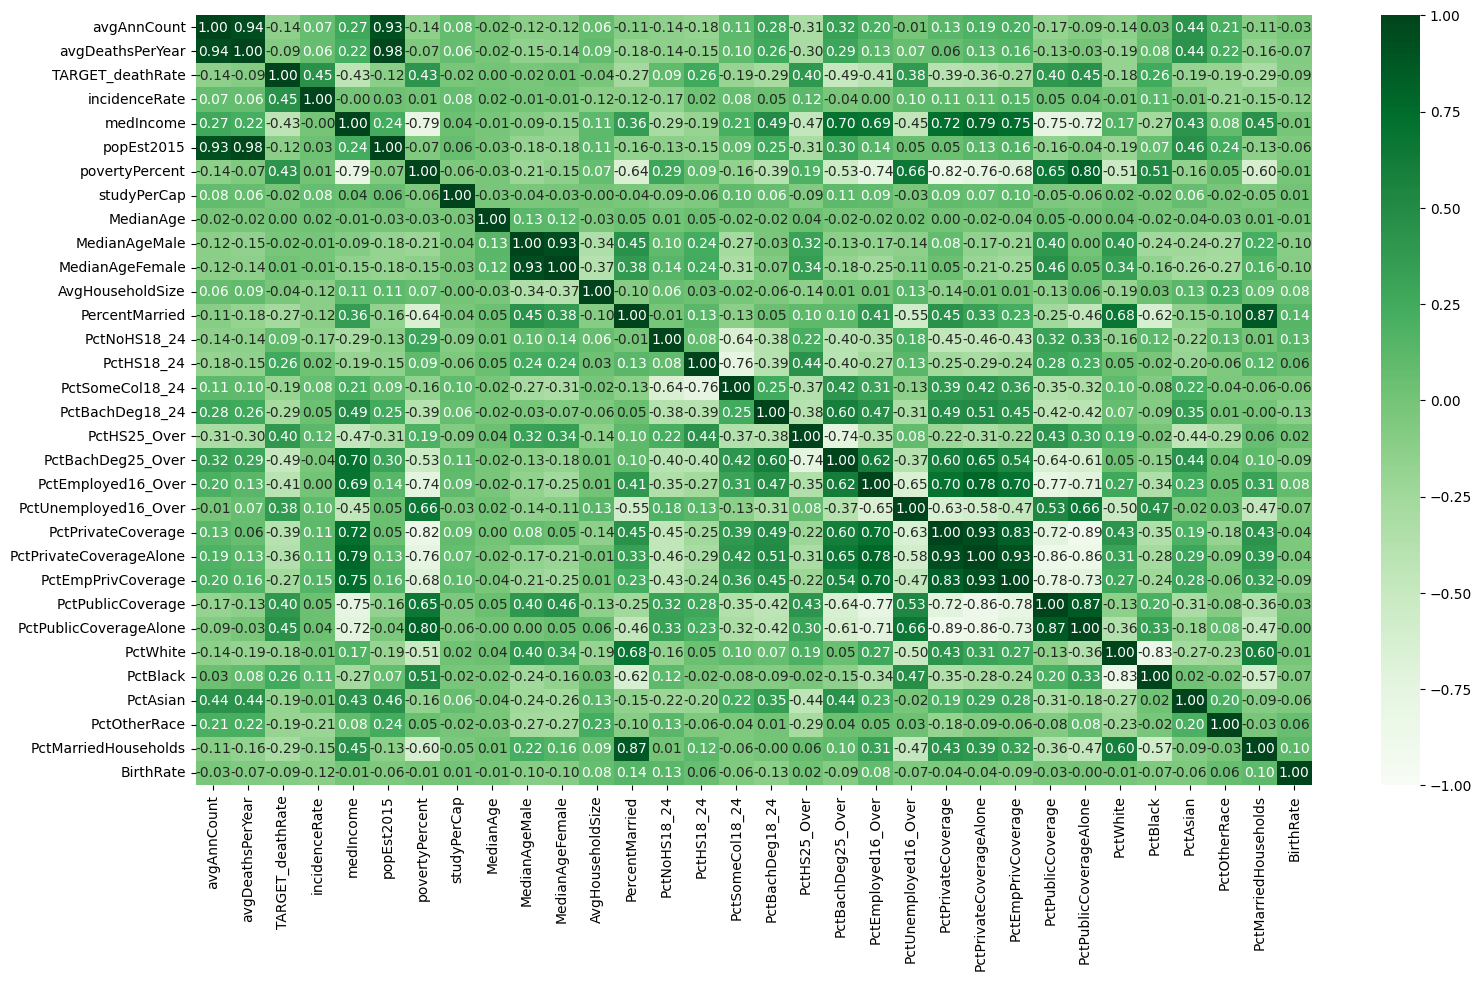

Valores de correlación en TARGET_deathRate superiores a 0.4 y menores a -0.4:
TARGET_deathRate          1.000000
incidenceRate             0.449432
medIncome                -0.428615
povertyPercent            0.429389
PctHS25_Over              0.404589
PctBachDeg25_Over        -0.485477
PctEmployed16_Over       -0.412046
PctPublicCoverage         0.404572
PctPublicCoverageAlone    0.449358
Name: TARGET_deathRate, dtype: float64


In [ ]:
# Calcula la matriz de correlación para todas las columnas en el DataFrame
correlation_matrix = df_cancer.corr()

# Aumenta el tamaño del gráfico
plt.figure(figsize=(18, 10))

sns.heatmap(data=correlation_matrix, annot=True, fmt=".2f", vmax=1, vmin=-1, cmap="Greens")

plt.show()

# Seleccionar la columna de correlación TARGET_deathRate
target_correlation = correlation_matrix["TARGET_deathRate"]

# Filtra los valores de correlación superiores a 0.4 y menores a -0.4
filtered_correlations = target_correlation[(target_correlation > 0.4) | (target_correlation < -0.4)]

# Mostrar solo los valores que cumplen con el filtro
print("Valores de correlación en TARGET_deathRate superiores a 0.4 y menores a -0.4:")
print(filtered_correlations)

#### 5.2 Realice un mapa de calor con una matriz de varianza-covarianza

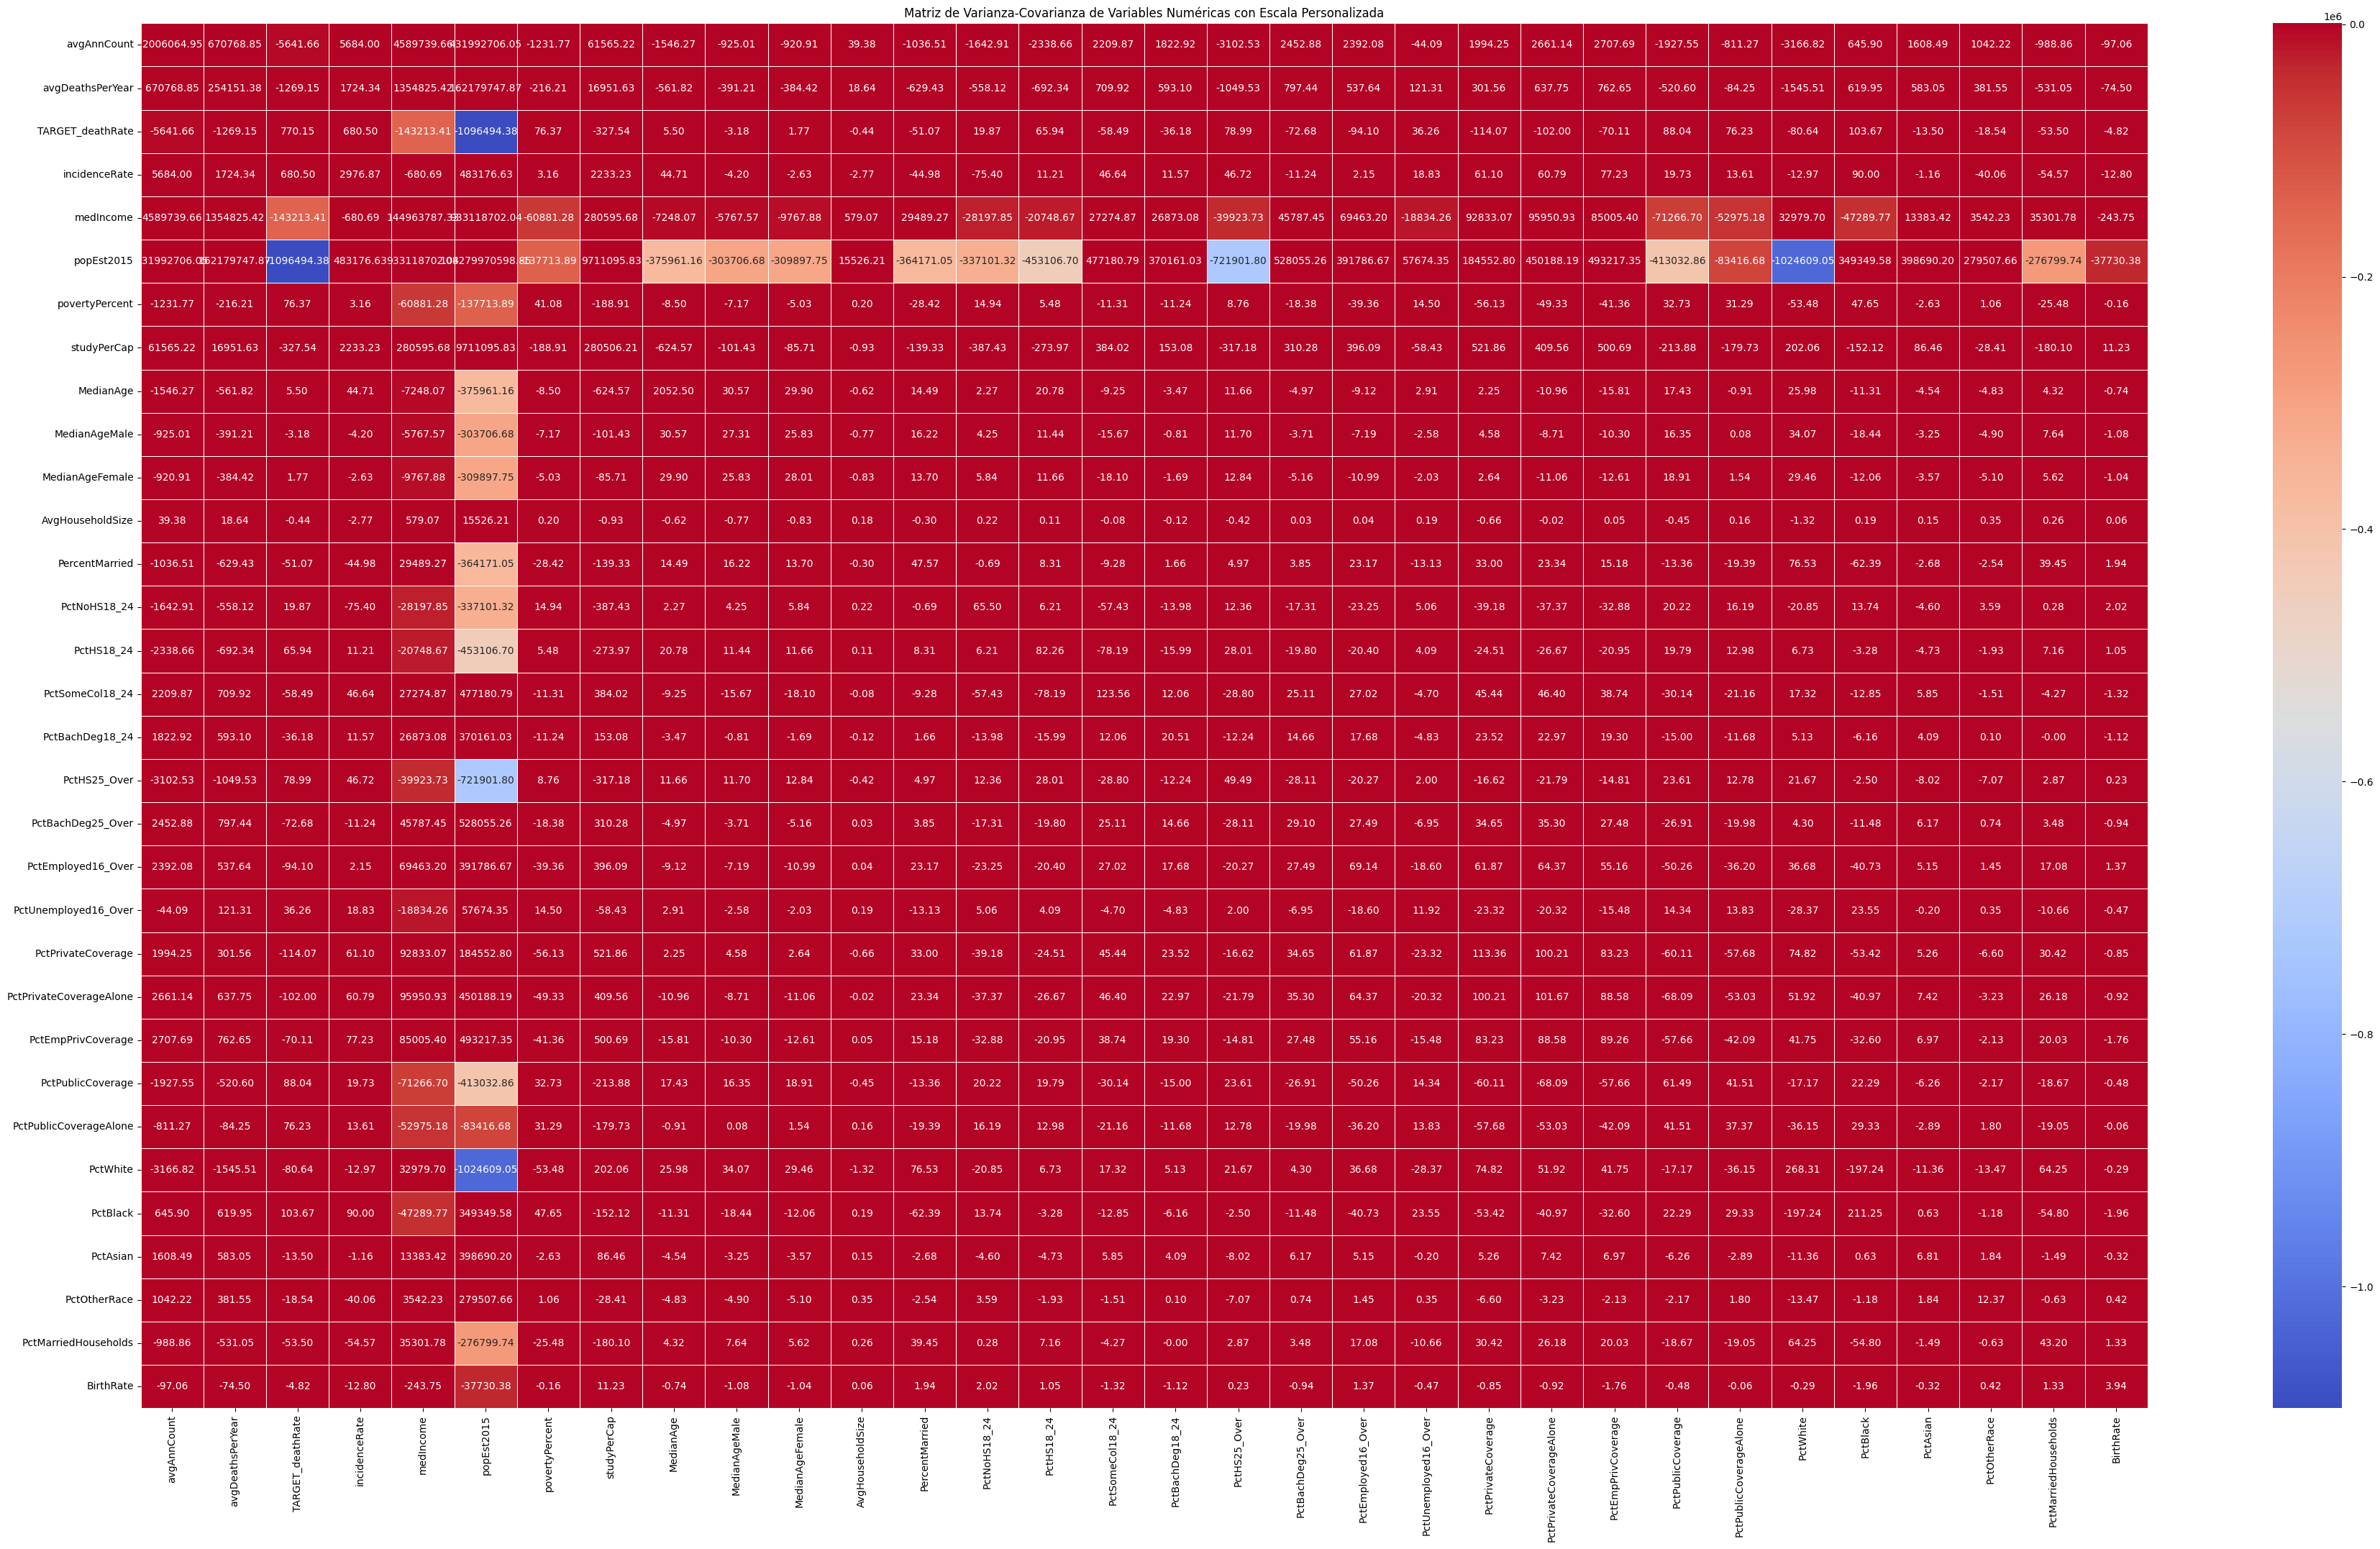

In [ ]:
# Calcula la matriz de varianza-covarianza para columnas numéricas
covariance= df_cancer.select_dtypes(include=["int64", "float64"]).cov()

# Ajusta el tamaño del gráfico
plt.figure(figsize=(45, 25))

# Encuentra el valor máximo y mínimo y sus ubicaciones en la matriz
max_covariance = covariance.values.max()
min_covariance = covariance.values.min()

sns.heatmap(data=covariance, cmap="coolwarm", annot=True, fmt=".2f", linewidths=0.5, vmax=7.701464e+02, vmin=  -1.096494e+06)

# Configura las etiquetas de los ejes
plt.xticks(rotation=90)
plt.title("Matriz de Varianza-Covarianza de Variables Numéricas con Escala Personalizada")

# Muestra el gráfico
plt.show()

In [ ]:
# Extrae la covarianza de "TARGET_deathRate" con otras variables
deathRate = covariance["TARGET_deathRate"]

print(deathRate)

cov= covariance["TARGET_deathRate"]
cov = cov.drop(max_cov_variable)
# Obtener el nombre de la variable con covarianza mínima
min_cov_variable = cov.idxmin()
# Imprimir la covarianza mínima y máxima
print(min_cov_variable)
print("Covarianza Mínima:", cov.min())
# Obtener el nombre de la variable con covarianza máxima
max_cov_variable = cov.idxmax()
print(max_cov_variable)
print("Covarianza Máxima:", cov.max())

avgAnnCount               -5.641658e+03
avgDeathsPerYear          -1.269149e+03
TARGET_deathRate           7.701464e+02
incidenceRate              6.805038e+02
medIncome                 -1.432134e+05
popEst2015                -1.096494e+06
povertyPercent             7.637192e+01
studyPerCap               -3.275448e+02
MedianAge                  5.500644e+00
MedianAgeMale             -3.180422e+00
MedianAgeFemale            1.769722e+00
AvgHouseholdSize          -4.395510e-01
PercentMarried            -5.106948e+01
PctNoHS18_24               1.986824e+01
PctHS18_24                 6.593895e+01
PctSomeCol18_24           -5.848552e+01
PctBachDeg18_24           -3.617527e+01
PctHS25_Over               7.898783e+01
PctBachDeg25_Over         -7.268209e+01
PctEmployed16_Over        -9.410020e+01
PctUnemployed16_Over       3.625513e+01
PctPrivateCoverage        -1.140715e+02
PctPrivateCoverageAlone   -1.020049e+02
PctEmpPrivCoverage        -7.010882e+01
PctPublicCoverage          8.804295e+01


"avgAnnCount": La covarianza positiva sugiere que un aumento en "avgAnnCount" se asocia con un aumento en "TARGET_deathRate". "incidenceRate": La covarianza positiva sugiere que un aumento en la tasa de incidencia se asocia con un aumento en "TARGET_deathRate"."PctBlack": La covarianza positiva indica que una mayor proporción de población afroamericana se relaciona con tasas de mortalidad por cáncer más altas.

"medIncome": La covarianza negativa sugiere que un aumento en el ingreso medio se asocia con una disminución en "TARGET_deathRate"."PctHS25_Over": La covarianza negativa indica que una mayor proporción de personas con educación secundaria (High School) se asocia con tasas de mortalidad por cáncer más bajas.
"PctWhite": La covarianza negativa sugiere que una mayor proporción de población blanca se relaciona con tasas de mortalidad por cáncer más bajas.

Luego de este extenso análisis de los datos, argumente cuáles son las varaibles que considera de mayor utilidad, con cuáles considera continuar y elimine las columnas que no va a utilizar.

### 6. Eliminar columnas innecesarias (drop) (un punto)

In [ ]:
columnas_a_mantener = ["TARGET_deathRate", "incidenceRate", "medIncome", "povertyPercent", "PctHS25_Over", "PctBachDeg25_Over", "PctEmployed16_Over", "PctPublicCoverage", "PctPublicCoverageAlone"]

# Crea un nuevo DataFrame con solo las columnas seleccionadas
df_cancer_seleccionado = df_cancer[columnas_a_mantener]
df = df_cancer.drop(columnas_a_mantener, axis=1)

print(df)


      avgAnnCount  avgDeathsPerYear  popEst2015  studyPerCap  \
0     1397.000000               469      260131   499.748204   
1      173.000000                70       43269    23.111234   
2      102.000000                50       21026    47.560164   
3      427.000000               202       75882   342.637253   
4       57.000000                26       10321     0.000000   
...           ...               ...         ...          ...   
3042  1962.667684                15        6343     0.000000   
3043  1962.667684                43       37118   377.175494   
3044  1962.667684                46       34536  1968.959926   
3045  1962.667684                52       25609     0.000000   
3046  1962.667684                48       37030     0.000000   

               binnedInc  MedianAge  MedianAgeMale  MedianAgeFemale  \
0      (61494.5, 125635]       39.3           36.9             41.7   
1     (48021.6, 51046.4]       33.0           32.2             33.7   
2     (48021.6, 51

## Regresión Lineal
    

Luego de analizar la base de datos, realice diversos modelos de regresión lineal que le permitan predecir la variable dependiente `TARGET_deathRate`. Al final de este trabajo, deberá explicar cuál de los modelos se ajusta mejor a los datos y logra predecir mejor la cantidad de muertes por cancer.

### 7 Regresión lineal simple con una variable numérica (un punto)

Genere un modelo de regresión lineal simple con una variable numérica.<br>
Analice los componentes del modelo y si se cumplen los <b>supuestos</b> vistos en clase.
Finalmente, luego de generar el modelo genere un gráfico de dispersión con el modelo lineal.

Y=β
0
​
 +β
1
​
 ⋅X

Donde:
Y=TARGET_deathRate

​X= es "medIncome", "incidenceRate".

β0=es el intercepto (coeficiente constante).

β1=es el coeficiente de "medIncome".


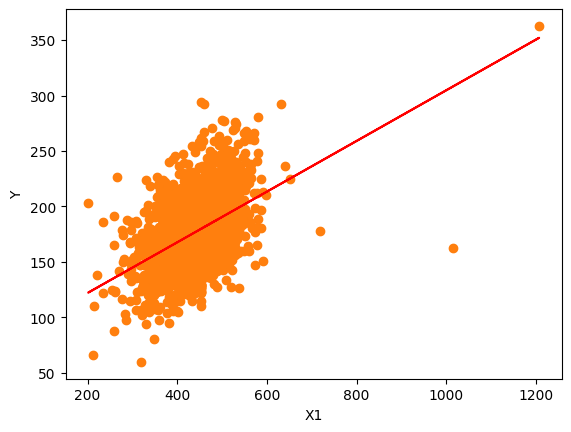

Ecuación de la línea de regresión: Y = 76.19 + 0.23 * X


In [ ]:
modelo1 = LinearRegression()

# Variables predictoras (incidenceRate) y variable objetivo (TARGET_deathRate)
X = df_cancer['incidenceRate'].values.reshape(-1, 1)
y = df_cancer['TARGET_deathRate']

# Ajustar el modelo a los datos
modelo1.fit(X, y)

# Crear un DataFrame para visualizar los datos
base1 = pd.DataFrame({'X1': X.flatten(), 'Y': y})

# Crear un gráfico de dispersión
sns.scatterplot(x='X1', y='Y', data=base1)

predicciones = modelo1.predict(X)
plt.scatter(X, Y)
plt.plot(X, predicciones, color='red')
plt.xlabel('X1')
plt.ylabel('Y')
plt.show()
intercepto = modelo1.intercept_
coeficiente_incidencia = modelo1.coef_[0]
print(f"Ecuación de la línea de regresión: Y = {intercepto:.2f} + {coeficiente_incidencia:.2f} * X")


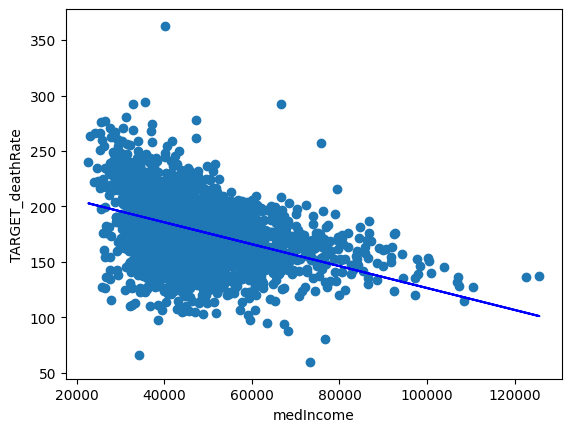

Ecuación de la línea de regresión: Y = 225.16 + -0.00 * X


In [ ]:
# Crear un modelo de regresión lineal
modelo2 = LinearRegression()

# Variables predictoras (medIncome) y variable objetivo (TARGET_deathRate)
X = df_cancer['medIncome'].values.reshape(-1, 1)
y = df_cancer['TARGET_deathRate']

# Ajustar el modelo a los datos
modelo2.fit(X, y)

# Crear un DataFrame para visualizar los datos
base2 = pd.DataFrame({"X": X.flatten(), "Y": y})

# Crear un gráfico de dispersión
sns.scatterplot(x="X", y="Y", data=base2, color="blue")

# Realizar predicciones
predicciones = modelo2.predict(X)

# Graficar los datos y la línea de regresión
plt.scatter(X, y)
plt.plot(X, predicciones, color="blue")
plt.xlabel("medIncome")
plt.ylabel("TARGET_deathRate")
plt.show()
intercepto = modelo2.intercept_
coeficiente_incidencia = modelo2.coef_[0]
print(f"Ecuación de la línea de regresión: Y = {intercepto:.2f} + {coeficiente_incidencia:.2f} * X")

### 8. Regresión lineal simple con una variable categórica (un punto)

Genere un modelo de regresión lineal simple con la varaible categórica que se creó en el primer punto.<br>

In [ ]:
categoricas = df_cancer.select_dtypes(include=['object']).columns
print("Variables categóricas en df_cancer:")
for variable in categoricas:
    print(variable)

categorias_geography = df_cancer["binnedInc"].unique()
print(categorias_geography)

Variables categóricas en df_cancer:
binnedInc
Geography
['(61494.5, 125635]' '(48021.6, 51046.4]' '(42724.4, 45201]'
 '(51046.4, 54545.6]' '(37413.8, 40362.7]' '(40362.7, 42724.4]'
 '(54545.6, 61494.5]' '(34218.1, 37413.8]' '[22640, 34218.1]'
 '(45201, 48021.6]']


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


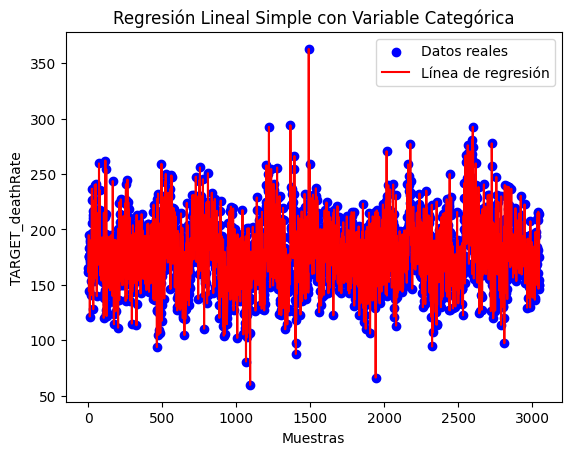

Intercepto: 173.12
Coeficientes: [ 10.57803035  57.37803035  43.07803035 ...  11.17803035 -60.62196965
 -46.82196965]


In [ ]:
X = df_cancer[["Geography"]]
y = df_cancer['TARGET_deathRate']

# Codifica la variable categórica utilizando one-hot encoding
encoder = OneHotEncoder(sparse=False)
X_encoded = encoder.fit_transform(X)

# Crea un modelo de regresión lineal
modelo = LinearRegression()

# Ajusta el modelo a los datos
modelo.fit(X_encoded, y)

# Realiza predicciones
predicciones = modelo.predict(X_encoded)

# Grafica los datos y la línea de regresión
plt.scatter(range(len(y)), y, label='Datos reales', color='blue')
plt.plot(range(len(y)), predicciones, label='Línea de regresión', color='red')
plt.xlabel('Muestras')
plt.ylabel('TARGET_deathRate')
plt.legend()
plt.title('Regresión Lineal Simple con Variable Categórica')
plt.show()

# Obtiene los coeficientes del modelo
intercepto = modelo.intercept_
coeficientes = modelo.coef_

print(f'Intercepto: {intercepto:.2f}')
print(f'Coeficientes: {coeficientes}')


### 9. Regresión lineal múltiple con las variables que sean de su interés (dos puntos)

> Bloque con sangría



Genere un modelo de regresión lineal múltiple con las variables que considere que son de interés para usted.<br>
Analice los componentes del modelo y si se cumplen los <b>supuestos</b> vistos en clase.

Variable: incidenceRate
Intercepto: 93.72
Coeficiente: 0.1886

Variable: medIncome
Intercepto: 221.51
Coeficiente: -0.0009

Variable: povertyPercent
Intercepto: 152.24
Coeficiente: 1.6055

Variable: PctHS25_Over
Intercepto: 125.84
Coeficiente: 1.5098

Variable: PctBachDeg25_Over
Intercepto: 209.28
Coeficiente: -2.2948

Variable: PctPublicCoverage
Intercepto: 133.92
Coeficiente: 1.2482

Variable: PctPublicCoverageAlone
Intercepto: 144.96
Coeficiente: 1.7775



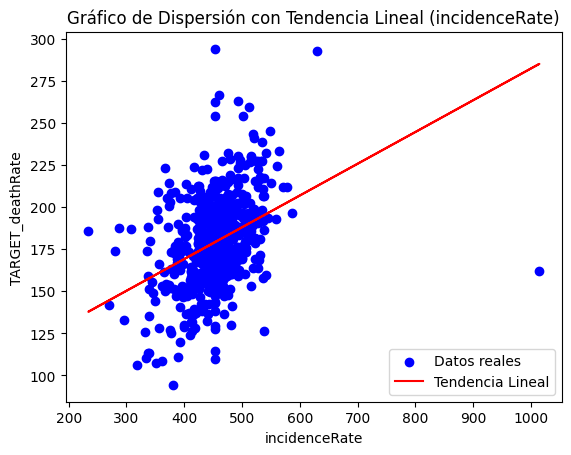

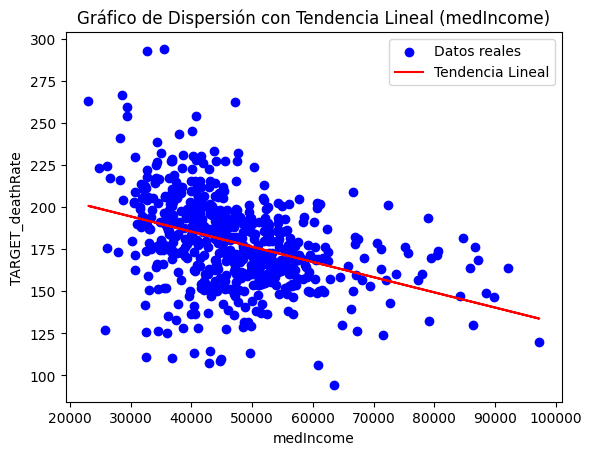

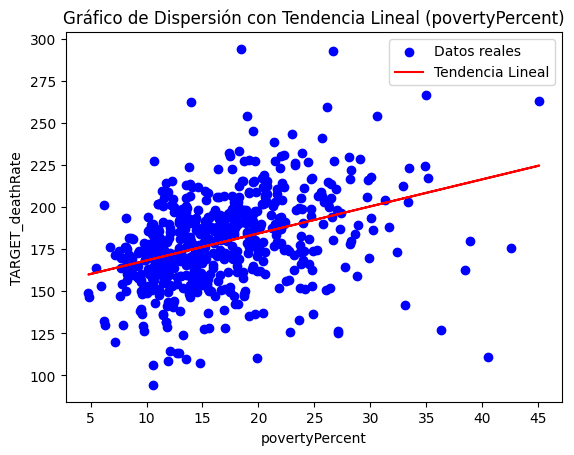

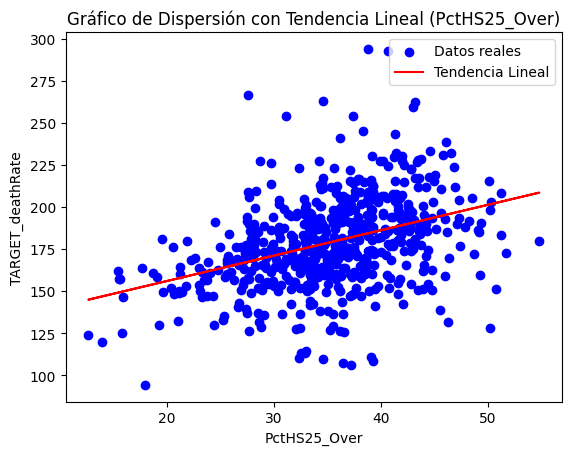

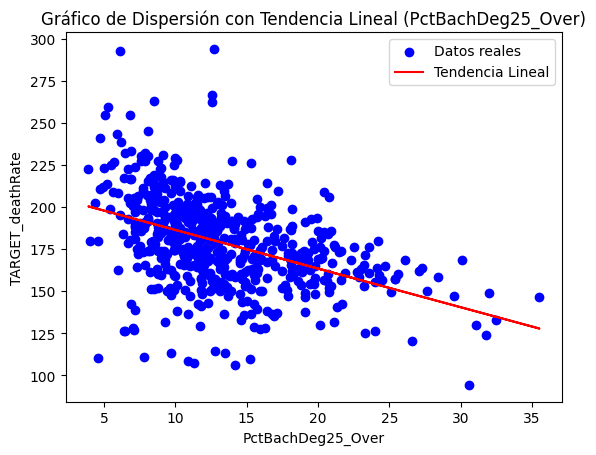

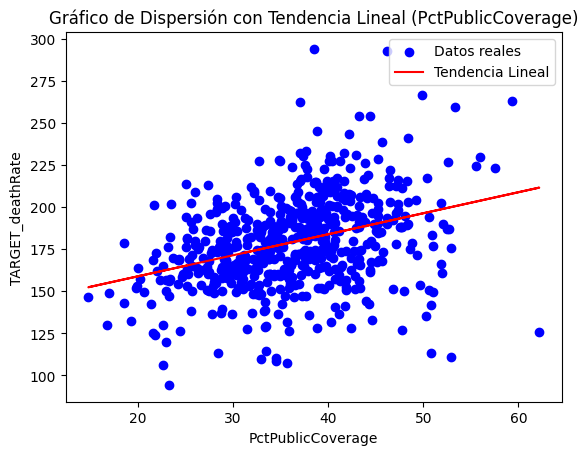

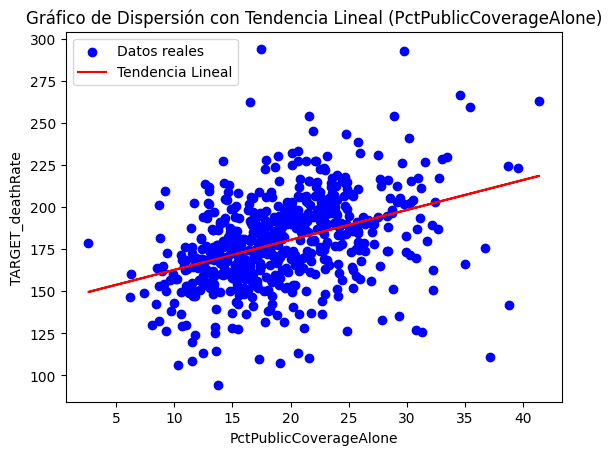

In [ ]:
# Variables predictoras (independientes)
variables_predictoras = ["incidenceRate", "medIncome", "povertyPercent", "PctHS25_Over", "PctBachDeg25_Over", "PctPublicCoverage", "PctPublicCoverageAlone"]

# Variable objetivo (dependiente)
y = df_cancer["TARGET_deathRate"]

# Crear un modelo de regresión lineal
modelo = LinearRegression()

# Almacenar los interceptos y coeficientes en diccionarios
interceptos = {}
coeficientes = {}

for variable in variables_predictoras:
    X = df_cancer[variable].values.reshape(-1, 1)
    modelo.fit(X, y)
    interceptos[variable] = modelo.intercept_
    coeficientes[variable] = modelo.coef_[0]

# Imprimir los resultados
for variable in variables_predictoras:
    print(f"Variable: {variable}")
    print(f"Intercepto: {interceptos[variable]:.2f}")
    print(f"Coeficiente: {coeficientes[variable]:.4f}")
    print()

# Crear un gráfico de dispersión con línea de tendencia para cada variable
for variable in variables_predictoras:
    X = df_cancer[variable]
    tendencia_lineal = interceptos[variable] + coeficientes[variable] * X

    plt.scatter(X, y, label="Datos reales", color="blue")
    plt.plot(X, tendencia_lineal, label="Tendencia Lineal", color="red")

    plt.xlabel(variable)
    plt.ylabel("TARGET_deathRate")
    plt.legend()
    plt.title(f"Gráfico de Dispersión con Tendencia Lineal ({variable})")
    plt.show()

### 10. Regresión lineal múltiple con las variables que aporten más al modelo (cinco puntos)

Haciendo uso de los elementos vistos en clase, realice pruebas sobre las variables para detectar las que puedan llegar a ser más relevantes para el modelo.<br>
Luego genere un modelo con múltiples variables, haciendo uso de las varaibles independientes que identificó como relevantes.

 Los valores p en la columna P>|t| indican si cada variable independiente es estadísticamente significativa. En este caso, "incidenceRate," "PctHS25_Over," "PctBachDeg25_Over," "PctEmployed16_Over," y "PctPublicCoverageAlone" tienen valores p significativamente bajos (menores que 0.05), lo que sugiere que son variables estadísticamente significativas en el modelo.

#### Realice un análisis de las variables para generar un modelo de regresión lineal con las variables que aporten más al modelo

Genere un modelo de regresión lineal múltiple con las variables que identificó como relevantes.<br>
Analice los componentes del modelo y si se cumplen los <b>supuestos</b> vistos en clase.

                            OLS Regression Results                            
Dep. Variable:       TARGET_deathRate   R-squared:                       0.390
Model:                            OLS   Adj. R-squared:                  0.385
Method:                 Least Squares   F-statistic:                     74.91
Date:                Mon, 23 Oct 2023   Prob (F-statistic):           1.29e-60
Time:                        02:52:24   Log-Likelihood:                -2645.7
No. Observations:                 591   AIC:                             5303.
Df Residuals:                     585   BIC:                             5330.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     86

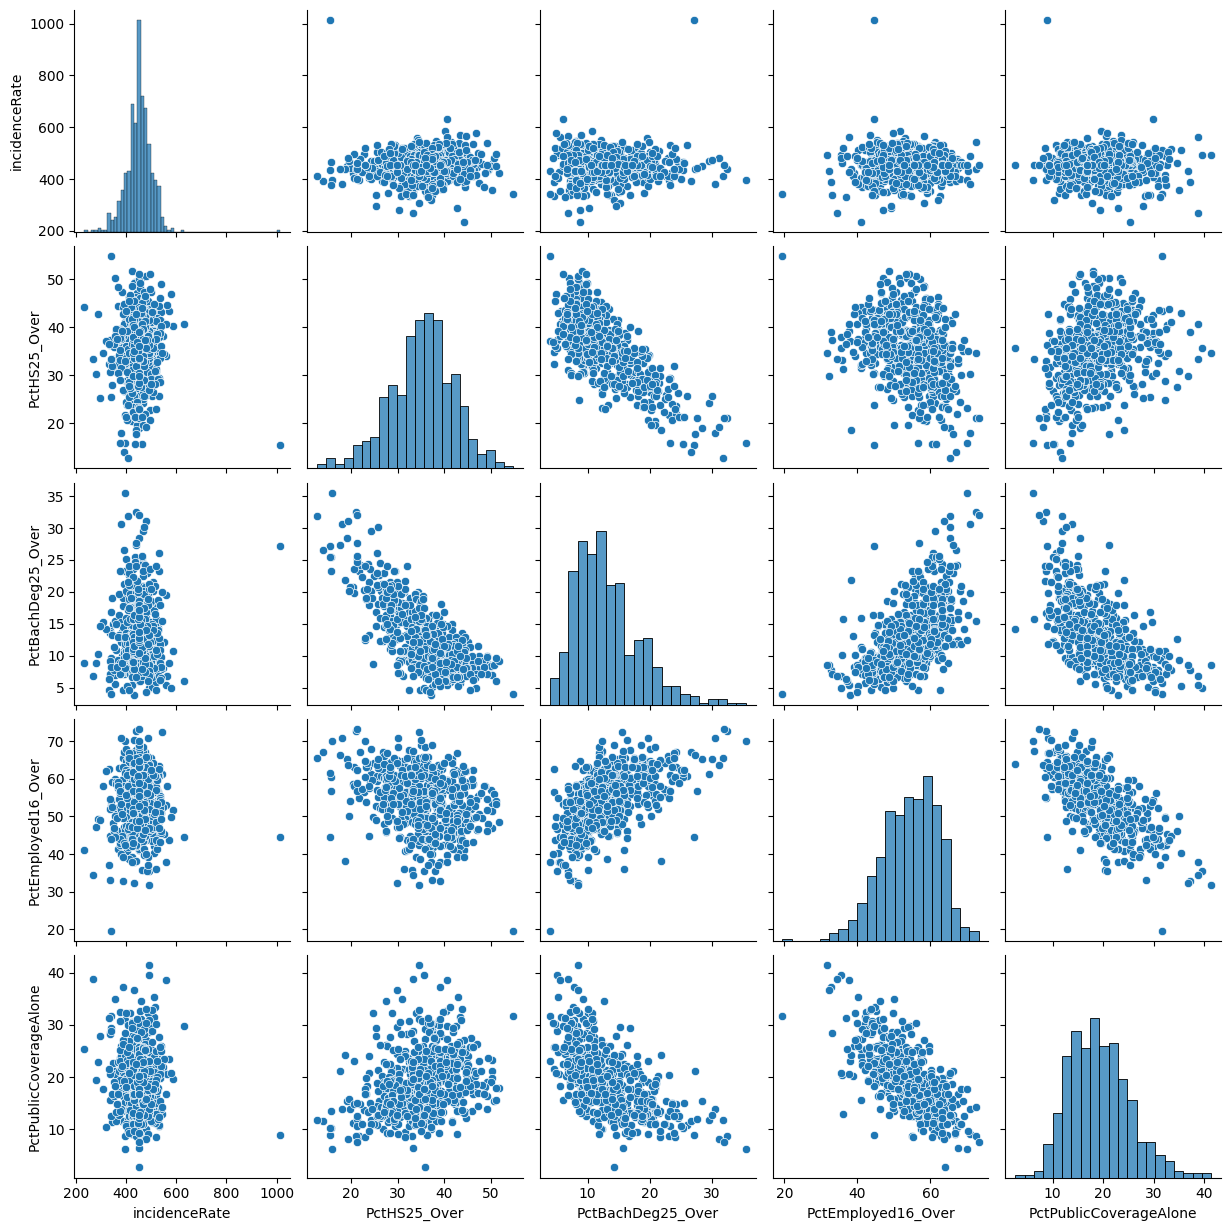

In [ ]:
# Crear un DataFrame con las variables seleccionadas
df_selected = df_cancer[["incidenceRate", "PctHS25_Over", "PctBachDeg25_Over", "PctEmployed16_Over", "PctPublicCoverageAlone"]]

# Variable objetivo (dependiente)
y = df_cancer["TARGET_deathRate"]

# Agregar una constante (intercepto) al modelo
X = sm.add_constant(df_selected)

# Inicializar el modelo
modelo = sm.OLS(y, X).fit()

# Obtener estadísticas de resumen
resumen = modelo.summary()
print(resumen)

# Calcular las correlaciones entre las variables seleccionadas
correlaciones = df_selected.corr()
print(correlaciones)
# Graficar las relaciones entre las variables seleccionadas
sns.pairplot(df_selected)

                            OLS Regression Results                            
Dep. Variable:       TARGET_deathRate   R-squared:                       0.406
Model:                            OLS   Adj. R-squared:                  0.401
Method:                 Least Squares   F-statistic:                     75.96
Date:                Mon, 23 Oct 2023   Prob (F-statistic):           1.27e-60
Time:                        03:27:53   Log-Likelihood:                -2482.6
No. Observations:                 562   AIC:                             4977.
Df Residuals:                     556   BIC:                             5003.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     90

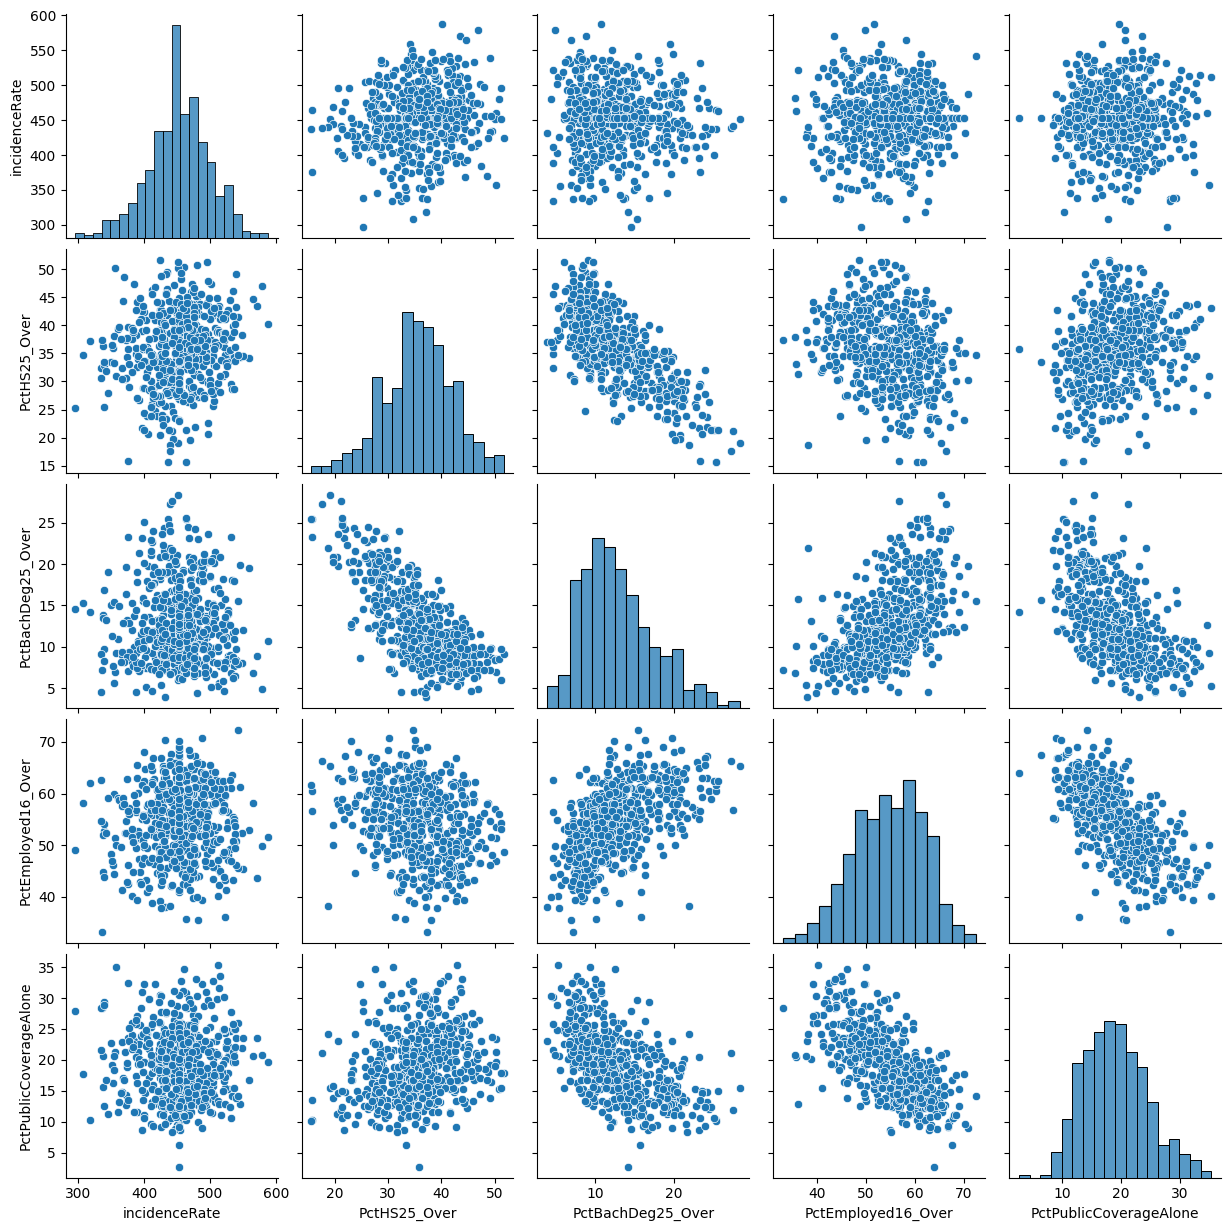

In [ ]:
# Crear un DataFrame con las variables seleccionadas SIN DATOS ATIPICOS
df_selected1= df_cleaned[["incidenceRate", "PctHS25_Over", "PctBachDeg25_Over", "PctEmployed16_Over", "PctPublicCoverageAlone"]]

# Variable objetivo (dependiente)
y = df_cleaned["TARGET_deathRate"]

# Agregar una constante (intercepto) al modelo
X = sm.add_constant(df_selected1)

# Inicializar el modelo
modelo = sm.OLS(y, X).fit()

# Obtener estadísticas de resumen
resumen = modelo.summary()
print(resumen)

# Obtener los coeficientes del modelo
coeficientes = modelo.params

# Mostrar la ecuación de la recta
print("Ecuación de la recta:")
print("TARGET_deathRate =", coeficientes['const'], end=" ")
for variable in df_selected.columns:
    coef = coeficientes[variable]
    print(f"+ ({coef:.4f}) * {variable}", end=" ")
print()

# Analizar la multicolinealidad
correlaciones = df_selected.corr()
print("Matriz de correlaciones:")
print(correlaciones)
# Graficar las relaciones entre las variables seleccionadas
sns.pairplot(df_selected)

#### Evalúe cual de los modelos generados es mejor se ajusta de una mejor manera a los datos. Argumente

El valor R-cuadrado para modelo 1 con datos atipicos es de aproximadamente 0.39. Esto indica que el 39% de la variabilidad en la variable objetivo "TARGET_deathRate" puede explicarse por las variables independientes incluidas en el modelo a demas de un F-statistic: 74.91.

El valor R-cuadrado para modelo 1 SIN datos atipicos es de aproximadamente 0.406. Esto indica que el 40.6% de la variabilidad en la variable objetivo "TARGET_deathRate" puede explicarse por las variables independientes incluidas en el modelo a demas de un F-statistic: 75.96.

Las variables seleccionadas tienen una significancia estadística en la predicción del objetivo "TARGET_deathRate", y el modelo tiene un valor R-cuadrado ajustado decente. Sin embargo, es importante considerar la multicolinealidad entre las variables, ya que puede afectar la interpretación de los coeficientes.

In [ ]:
import statsmodels.api as sm
from scipy.stats import shapiro
from statsmodels.stats.diagnostic import het_white
from statsmodels.compat import lzip

# Calcular los residuos del modelo
residuales = modelo.resid

# Prueba de Shapiro-Wilk para normalidad de residuos
shapiro_test = shapiro(residuales)

# Prueba de White para verificar la homocedasticidad de los residuos
white_test = het_white(residuales, X)
# Imprimir los resultados de ambas pruebas
print("Prueba de Shapiro-Wilk para normalidad de residuos:")
print("Estadístico de prueba:", shapiro_test[0])
print("Valor p:", shapiro_test[1])

print("\nPrueba de White para homocedasticidad de residuos:")
lzip(["LM Statistic", "LM-Test p-value", "F-Statistic", "F-Test p-value"], white_test)

Prueba de Shapiro-Wilk para normalidad de residuos:
Estadístico de prueba: 0.9708521962165833
Valor p: 3.933451786508613e-09

Prueba de White para homocedasticidad de residuos:


[('LM Statistic', 35.344102376262256),
 ('LM-Test p-value', 0.0183463432749927),
 ('F-Statistic', 1.8153370608619597),
 ('F-Test p-value', 0.01658897245459581)]

## Análisis consolidado (diez puntos)

Realice un análisis consolidado (hasta 250 palabras) del ejercicio respondiendo:
1. Realice un resumen del ejercicio:

En este ejercicio, realizamos un análisis de regresión lineal múltiple para predecir la tasa de mortalidad (TARGET_deathRate) en función de varias variables predictoras en un conjunto de datos de cáncer.
2. ¿Cuales son las variables explicativas relevantes para predecir la tasa de mortalidad?

"incidenceRate", "PctHS25_Over", "PctBachDeg25_Over", "PctEmployed16_Over", "PctPublicCoverageAlone" con p-Valor< 0.05
3. ¿Qué hallazgos son relevantes en términos de outliers?

En términos de outliers, encontramos que había valores atípicos en el conjunto de datos que podrían afectar la calidad del modelo de regresión lineal. Se empleo el método Z-score para identificar estos valores atípicos en las variables predictoras y eliminamos las filas correspondientes. Esto ayudó a mitigar la influencia de valores atípicos en el modelo, mejorando así la robustez de las predicciones.
4. ¿Qué hallazgos son relevantes sobre cumplimiento de los supuestos?

Normalidad de los Residuos: La prueba de Shapiro-Wilk indicó que los residuos no siguen una distribución normal, con un valor p extremadamente bajo (3.93e-09). Esto sugiere que los residuos no se distribuyen simétricamente alrededor de cero, lo que plantea preocupaciones sobre la validez de algunas pruebas y estimaciones basadas en el modelo.

Homocedasticidad de los Residuos: La prueba de White para la homocedasticidad reveló evidencia de heteroscedasticidad en los residuos, con un valor p significativo (0.0183). Esto implica que la varianza de los residuos no es constante a través de los diferentes niveles de las variables independientes, lo que afecta la precisión de las estimaciones.

Criterios de calificación (sobre **10 puntos**):

**10 puntos**: Si presenta las conclusiones de forma clara, respondiendo las preguntas enunciadas, las sustenta con cifras y referencia los resultados previos.
**6 puntos**: Se presentan las conclusiones de forma clara respondiendo las preguntas, pero no se referencian cifras, ni análisis previos.
**3 puntos** Se presentan conclusiones, pero no se responden las preguntas.



## Criterios de evaluación

La calificación estarára dada por:

1. 5 puntos: Claridad en la implementación. El código se encuentra con comentarios.
2. 15 puntos: Ejecución del notebook y los análisis.
3. 10 puntos: Análisis final consolidando hallazgos.

Modelo con todas las variables:

1. MODELO CON DATOS ATIPICOS:
R-cuadrado ajustado: 0.390
F-statistic: 74.91
Variables: ["incidenceRate", "PctHS25_Over", "PctBachDeg25_Over", "PctEmployed16_Over", "PctPublicCoverageAlone"]
2. MODELO SIN DATOS ATIPICOS:
R-cuadrado ajustado: 0.406
F-statistic: 75.91
Variables: ["incidenceRate", "PctHS25_Over", "PctBachDeg25_Over", "PctEmployed16_Over", "PctPublicCoverageAlone"]


Un F-statistic más alto indica que el modelo con variables seleccionadas es más significativo en términos globales.